# 1. Đọc dữ liệu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
from utils.clustering_utils import cluster_summary_report
from utils.visualization_utils import plot_cluster_comparison
from utils.vectorization_utils import plot_dimensionality_reduction_analysis
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import re
import pickle

In [2]:
df = pd.read_excel("data/data_content_cleaned.xlsx")

In [3]:
df.columns = df.columns.str.replace(' ', '_')

In [4]:
df.head(5)

,id,Tiêu_đề,Giá,Khoảng_giá_min,Khoảng_giá_max,Mô_tả_chi_tiết,Thương_hiệu,Dòng_xe,Năm_đăng_ký,Số_Km_đã_đi,...,cc_numeric,price_segment_code,age,clean_text,is_moi,is_do_xe,is_su_dung_nhieu,is_bao_duong,is_do_ben,is_phap_ly
0,6188,Ban xe,2.5,2.50,2.50,"Do mình dư xe không dùng nữa, xe máy móc vẫn c...",Aprilia,2015 Rsv4 R Aprc Abs,2008,20,...,75,1,17.0,dư xe không xe_máy_móc zin êm_ru thanh_lí gấp ...,0,0,1,0,0,0
1,2735,Cần bán chiếc aprillia gt rs200 xe trùm mềm,81.0,81.00,81.00,Xe nhà trùm mềm chỉ đẩy ra đẩy vô nay phụ huyn...,Aprilia,Sr Gt 200,2023,5000,...,137,2,2.0,xe trùm mềm đẩy đẩy vô phụ_huynh lớn_tuổi đẩy ...,0,0,0,0,0,0
2,5791,Bán xe Sr Gt 200 ít sử dụng do đi oto,72.0,69.00,81.00,"Xe biển hcm, ít sử dụng còn rất mới\nLiên hệ: ***",Aprilia,Sr Gt 200,2022,10000,...,137,2,3.0,xe biển hcm liên_hệ,0,0,0,0,0,0
3,839,Nâng cấp CC để lại BMW G310R đk 2023,78.4,72.13,84.67,"Xe tâm huyết rất ít chạy, chi tiết:\n- 15xxx k...",Bmw,Dòng Khác,2023,15600,...,200,2,2.0,xe tâm_huyết chạy chi_tiết xxx km đk model san...,1,0,0,0,0,0
4,3092,BMW GS1250 HP,300.0,189.77,222.77,Bản GS1250 HP - ĐK 2020\nTình trạng xe:\n- Odo...,Bmw,Dòng Khác,2020,20091,...,200,3,5.0,gs hp đk xe odo km hqcn bs tp hcm khung chống ...,0,0,0,0,0,0


In [5]:
df.shape

(7138, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7138 entries, 0 to 7137
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  7138 non-null   int64  
 1   Tiêu_đề             7138 non-null   object 
 2   Giá                 7138 non-null   float64
 3   Khoảng_giá_min      7135 non-null   float64
 4   Khoảng_giá_max      7135 non-null   float64
 5   Mô_tả_chi_tiết      7138 non-null   object 
 6   Thương_hiệu         7135 non-null   object 
 7   Dòng_xe             7135 non-null   object 
 8   Năm_đăng_ký         7138 non-null   int64  
 9   Số_Km_đã_đi         7138 non-null   int64  
 10  Loại_xe             7138 non-null   object 
 11  Dung_tích_xe        7138 non-null   object 
 12  Xuất_xứ             7138 non-null   object 
 13  Phân_khúc_giá       7138 non-null   object 
 14  cc_numeric          7138 non-null   int64  
 15  price_segment_code  7138 non-null   int64  
 16  age   

In [7]:
df.describe()

,id,Giá,Khoảng_giá_min,Khoảng_giá_max,Năm_đăng_ký,Số_Km_đã_đi,cc_numeric,price_segment_code,age,is_moi,is_do_xe,is_su_dung_nhieu,is_bao_duong,is_do_ben,is_phap_ly
count,7138.000000,7138.000000,7135.000000,7135.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000
mean,3600.226114,29.579133,24.492290,28.522682,2013.716867,36874.275147,130.037966,1.103250,11.288106,0.069207,0.020454,0.057579,0.047072,0.064584,0.178481
std,2079.654101,41.800792,33.142458,37.653666,7.878889,32607.128460,29.253993,0.346908,7.871919,0.253824,0.141557,0.232962,0.211808,0.245807,0.382944
min,1.000000,1.200000,1.230000,1.440000,1979.000000,0.000000,40.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1798.250000,8.500000,7.975000,9.360000,2010.000000,10000.000000,137.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3599.500000,16.500000,14.530000,17.050000,2015.000000,28000.000000,137.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5399.750000,33.000000,28.440000,33.390000,2019.000000,53243.250000,137.000000,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7208.000000,886.000000,815.120000,956.880000,2025.000000,99999.000000,200.000000,3.000000,46.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 2. EDA

In [4]:
print("Số NaN mỗi cột:")
print(df.isna().sum().sort_values(ascending=False).head(20))

print("Tổng số NaN toàn bộ:", df.isna().sum().sum())

Số NaN mỗi cột:
Khoảng_giá_min        3
Khoảng_giá_max        3
Thương_hiệu           3
Dòng_xe               3
id                    0
cc_numeric            0
is_do_ben             0
is_bao_duong          0
is_su_dung_nhieu      0
is_do_xe              0
is_moi                0
clean_text            0
age                   0
price_segment_code    0
Xuất_xứ               0
Phân_khúc_giá         0
Tiêu_đề               0
Dung_tích_xe          0
Loại_xe               0
Số_Km_đã_đi           0
dtype: int64
Tổng số NaN toàn bộ: 12


In [5]:
# Xử lý NaN bằng cách xoá vì rất ít dòng bị ảnh hưởng
df = df.dropna()

In [10]:
for col in df.columns:
    n = df[col].nunique()
    print(f'{col} has {n} unique values')

id has 7135 unique values
Tiêu_đề has 6778 unique values
Giá has 678 unique values
Khoảng_giá_min has 1382 unique values
Khoảng_giá_max has 1423 unique values
Mô_tả_chi_tiết has 7110 unique values
Thương_hiệu has 37 unique values
Dòng_xe has 194 unique values
Năm_đăng_ký has 45 unique values
Số_Km_đã_đi has 1095 unique values
Loại_xe has 3 unique values
Dung_tích_xe has 7 unique values
Xuất_xứ has 12 unique values
Phân_khúc_giá has 3 unique values
cc_numeric has 4 unique values
price_segment_code has 3 unique values
age has 45 unique values
clean_text has 7104 unique values
is_moi has 2 unique values
is_do_xe has 2 unique values
is_su_dung_nhieu has 2 unique values
is_bao_duong has 2 unique values
is_do_ben has 2 unique values
is_phap_ly has 2 unique values


In [6]:
# Chuẩn bị dữ liệu cho mô hình clustering, loại bỏ các cột không cần thiết/ leak thông tin giá
df_input = df.drop(["Giá","Khoảng_giá_min", "Khoảng_giá_max", "Năm_đăng_ký","id","Tiêu_đề","Mô_tả_chi_tiết","clean_text","Phân_khúc_giá"],axis=1)
df_output = df[["Giá"]]

In [7]:
# Split to numerical and category dfframe
df_input_cate = df_input.select_dtypes(include="O")
df_input_num = df_input.select_dtypes(exclude="O")

print("Numerical columns:", df_input_num.columns.tolist())
print("Categorical columns:", df_input_cate.columns.tolist())

Numerical columns: ['Số_Km_đã_đi', 'cc_numeric', 'price_segment_code', 'age', 'is_moi', 'is_do_xe', 'is_su_dung_nhieu', 'is_bao_duong', 'is_do_ben', 'is_phap_ly']
Categorical columns: ['Thương_hiệu', 'Dòng_xe', 'Loại_xe', 'Dung_tích_xe', 'Xuất_xứ']


In [8]:
# Check num of value of cate groups
for col in df_input_cate.columns:
    n_unique = df_input_cate[col].nunique()
    values_unique = df_input_cate[col].unique()
    
    if n_unique <= 10:
        print(f"{col} is a categorical feature with {n_unique} unique values: {values_unique}")
    else:
        print(f"{col} is a categorical feature with {n_unique} unique values")

Thương_hiệu is a categorical feature with 37 unique values
Dòng_xe is a categorical feature with 194 unique values
Loại_xe is a categorical feature with 3 unique values: ['Tay Ga' 'Tay Côn/Moto' 'Xe Số']
Dung_tích_xe is a categorical feature with 7 unique values: ['50 - 100 Cc' '100 - 175 Cc' 'Trên 175 Cc' 'Không Biết Rõ' 'Dưới 50 Cc'
 'Đang Cập Nhật' 'Nhật Bản']
Xuất_xứ is a categorical feature with 12 unique values


In [9]:
# Check num of value of num groups
for col in df_input_num.columns:
    n_unique = df_input_num[col].nunique()
    values_unique = df_input_num[col].unique()
    
    if n_unique <= 10:
        print(f"{col} is a categorical feature with {n_unique} unique values: {values_unique}")
    else:
        print(f"{col} is a numerical feature with {n_unique} unique values")

Số_Km_đã_đi is a numerical feature with 1095 unique values
cc_numeric is a categorical feature with 4 unique values: [ 75 137 200  40]
price_segment_code is a categorical feature with 3 unique values: [1 2 3]
age is a numerical feature with 45 unique values
is_moi is a categorical feature with 2 unique values: [0 1]
is_do_xe is a categorical feature with 2 unique values: [0 1]
is_su_dung_nhieu is a categorical feature with 2 unique values: [1 0]
is_bao_duong is a categorical feature with 2 unique values: [0 1]
is_do_ben is a categorical feature with 2 unique values: [0 1]
is_phap_ly is a categorical feature with 2 unique values: [0 1]


In [10]:
# Change `cc_numeric`, `price_segment_code`
# Với các cột số có ít giá trị duy nhất, chuyển sang string có thể tiết kiệm memory
# Một số thuật toán xử lý biến categorical tốt hơn khi chúng là string
df_input_num["cc_numeric"] = df_input_num["cc_numeric"].astype(object)

## 2.2. Create input_df with alter features dtype

In [11]:
df_input = pd.concat([df_input_num,df_input_cate], axis=1)

print(df_input.shape)
df_input.head(5)

(7135, 15)


,Số_Km_đã_đi,cc_numeric,price_segment_code,age,is_moi,is_do_xe,is_su_dung_nhieu,is_bao_duong,is_do_ben,is_phap_ly,Thương_hiệu,Dòng_xe,Loại_xe,Dung_tích_xe,Xuất_xứ
0,20,75,1,17.0,0,0,1,0,0,0,Aprilia,2015 Rsv4 R Aprc Abs,Tay Ga,50 - 100 Cc,Việt Nam
1,5000,137,2,2.0,0,0,0,0,0,0,Aprilia,Sr Gt 200,Tay Ga,100 - 175 Cc,Việt Nam
2,10000,137,2,3.0,0,0,0,0,0,0,Aprilia,Sr Gt 200,Tay Ga,100 - 175 Cc,Đang Cập Nhật
3,15600,200,2,2.0,1,0,0,0,0,0,Bmw,Dòng Khác,Tay Côn/Moto,Trên 175 Cc,Đức
4,20091,200,3,5.0,0,0,0,0,0,0,Bmw,Dòng Khác,Tay Côn/Moto,Trên 175 Cc,Đức


In [12]:
num_cols = ['Năm_đăng_ký', 'Số_Km_đã_đi', 'age', 'cc_numeric', 'price_segment_code']
cat_cols = ['Thương_hiệu', 'Dòng_xe', 'Loại_xe', 'Dung_tích_xe', 'Xuất_xứ', 'is_do_ben', 'is_bao_duong', 'is_su_dung_nhieu', 'is_do_xe', 'is_moi', 'is_phap_ly']
# Lý do không nên để biến binary vào num_cols:
# Khi scaling, các giá trị 0/1 có thể bị biến đổi, làm mất ý nghĩa binary
# Khó giải thích ý nghĩa sau khi scaling
# OneHotEncoder xử lý tốt các biến binary và giữ nguyên giá trị 0/1

# Lấy các cột số từ danh sách num_cols (chỉ lấy những cột tồn tại trong DataFrame)
df_input_num = df_input[[col for col in num_cols if col in df_input.columns]]

# Lấy các cột phân loại từ danh sách cat_cols (chỉ lấy những cột tồn tại trong DataFrame)
df_input_cate = df_input[[col for col in cat_cols if col in df_input.columns]]

print("Numerical columns:", df_input_num.columns.tolist())
print("Categorical columns:", df_input_cate.columns.tolist())

Numerical columns: ['Số_Km_đã_đi', 'age', 'cc_numeric', 'price_segment_code']
Categorical columns: ['Thương_hiệu', 'Dòng_xe', 'Loại_xe', 'Dung_tích_xe', 'Xuất_xứ', 'is_do_ben', 'is_bao_duong', 'is_su_dung_nhieu', 'is_do_xe', 'is_moi', 'is_phap_ly']


# 3. Feature Engineering

In [13]:
# encoded_input_cate = pd.get_dummies(df_input_cate, 
#                                     columns=df_input_cate.columns, 
#                                     drop_first=True, prefix='E_')
# encoded_input_cate = encoded_input_cate.reset_index().drop(['index'],axis=1)
# encoded_input_cate.head()

from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Create and fit the encoder
ohe = OneHotEncoder(
    drop='first',          # same as drop_first=True in get_dummies
    handle_unknown='ignore',
    sparse_output=False    # use 'sparse=False' if sklearn < 1.2
)

encoded_array = ohe.fit_transform(df_input_cate)

# Build column names with prefix 'E_' (similar to get_dummies prefix)
encoded_cols = ['E_' + name for name in ohe.get_feature_names_out(df_input_cate.columns)]

# Convert to DataFrame, keep same index as original then reset
encoded_input_cate = pd.DataFrame(encoded_array, columns=encoded_cols, index=df_input_cate.index)
encoded_input_cate = encoded_input_cate.reset_index(drop=True)

encoded_input_cate.head()

,E_Thương_hiệu_Bazan,E_Thương_hiệu_Benelli,E_Thương_hiệu_Bmw,E_Thương_hiệu_Brixton,E_Thương_hiệu_Cr&S,E_Thương_hiệu_Daelim,E_Thương_hiệu_Detech,E_Thương_hiệu_Ducati,E_Thương_hiệu_Gpx,E_Thương_hiệu_Halim,...,E_Xuất_xứ_Đang Cập Nhật,E_Xuất_xứ_Đài Loan,E_Xuất_xứ_Đức,E_Xuất_xứ_Ấn Độ,E_is_do_ben_1,E_is_bao_duong_1,E_is_su_dung_nhieu_1,E_is_do_xe_1,E_is_moi_1,E_is_phap_ly_1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
from collections import Counter
# Initialize a Counter to track column name occurrences (One-hot encoding tạo ra các cột trùng tên)
counter = Counter()
new_columns = []

# Iterate through the existing column names
for col in encoded_input_cate.columns:
    counter.update([col])
    if counter[col] == 1:
        # If it's the first occurrence, keep the name as is
        new_columns.append(col)
    else:
        # If it's a duplicate, append a suffix
        new_columns.append(f"{col}_{counter[col] - 1}")

# Assign the new list of column names to the DataFrame
encoded_input_cate.columns = new_columns

print(encoded_input_cate.columns.tolist())

['E_Thương_hiệu_Bazan', 'E_Thương_hiệu_Benelli', 'E_Thương_hiệu_Bmw', 'E_Thương_hiệu_Brixton', 'E_Thương_hiệu_Cr&S', 'E_Thương_hiệu_Daelim', 'E_Thương_hiệu_Detech', 'E_Thương_hiệu_Ducati', 'E_Thương_hiệu_Gpx', 'E_Thương_hiệu_Halim', 'E_Thương_hiệu_Harley Davidson', 'E_Thương_hiệu_Honda', 'E_Thương_hiệu_Hyosung', 'E_Thương_hiệu_Hãng Khác', 'E_Thương_hiệu_Kawasaki', 'E_Thương_hiệu_Keeway', 'E_Thương_hiệu_Kengo', 'E_Thương_hiệu_Ktm', 'E_Thương_hiệu_Kymco', 'E_Thương_hiệu_Moto Guzzi', 'E_Thương_hiệu_Nioshima', 'E_Thương_hiệu_Peugeot', 'E_Thương_hiệu_Piaggio', 'E_Thương_hiệu_Rebelusa', 'E_Thương_hiệu_Royal Enfield', 'E_Thương_hiệu_Sachs', 'E_Thương_hiệu_Sanda', 'E_Thương_hiệu_Suzuki', 'E_Thương_hiệu_Sym', 'E_Thương_hiệu_Taya', 'E_Thương_hiệu_Triumph', 'E_Thương_hiệu_Vento', 'E_Thương_hiệu_Victory', 'E_Thương_hiệu_Vinfast', 'E_Thương_hiệu_Visitor', 'E_Thương_hiệu_Yamaha', 'E_Dòng_xe_125/250', 'E_Dòng_xe_1290 Super Duke R', 'E_Dòng_xe_2015 Rsv4 R Aprc Abs', 'E_Dòng_xe_390', 'E_Dòng_xe_48', 'E

In [15]:
non_encoded = df_input.drop(df_input_cate.columns, axis=1)
X_encoded = pd.concat([non_encoded, encoded_input_cate], axis=1)

In [16]:
df_matrix = X_encoded.astype(float)
df_matrix.head()

,Số_Km_đã_đi,cc_numeric,price_segment_code,age,E_Thương_hiệu_Bazan,E_Thương_hiệu_Benelli,E_Thương_hiệu_Bmw,E_Thương_hiệu_Brixton,E_Thương_hiệu_Cr&S,E_Thương_hiệu_Daelim,...,E_Xuất_xứ_Đang Cập Nhật,E_Xuất_xứ_Đài Loan,E_Xuất_xứ_Đức,E_Xuất_xứ_Ấn Độ,E_is_do_ben_1,E_is_bao_duong_1,E_is_su_dung_nhieu_1,E_is_do_xe_1,E_is_moi_1,E_is_phap_ly_1
0,20.0,75.0,1.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,5000.0,137.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10000.0,137.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15600.0,200.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,20091.0,200.0,3.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_matrix_scaled = pd.DataFrame(scaler.fit_transform(df_matrix))
df_matrix_scaled.columns = df_matrix.columns

In [18]:
df_matrix_scaled.dtypes

Số_Km_đã_đi             float64
cc_numeric              float64
price_segment_code      float64
age                     float64
E_Thương_hiệu_Bazan     float64
                         ...   
E_is_bao_duong_1        float64
E_is_su_dung_nhieu_1    float64
E_is_do_xe_1            float64
E_is_moi_1              float64
E_is_phap_ly_1          float64
Length: 258, dtype: object

# 4. Choose important features

In [19]:
# Important features (PCA-based feature selection)
from sklearn.decomposition import PCA

feature_names = df_matrix_scaled.columns

# 1. Fit PCA với nhiều thành phần hơn để nắm được nhiều chiều biến thiên
n_components = 5
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(df_matrix_scaled)

# 2. Get loadings (độ đóng góp của từng feature vào mỗi PC)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)],
    index=feature_names,
)

# 3. Chọn top-k feature quan trọng nhất theo từng PC
important_features = []
_top_k_per_pc = 10

for pc in loadings.columns:
    top_features = loadings[pc].abs().sort_values(ascending=False).head(_top_k_per_pc)
    important_features += list(top_features.index)

# Loại trùng
important_features = list(set(important_features))

print("Số lượng important_features:", len(important_features))
print(important_features)

# Save list of important features
with open("data/importance_ohe.txt", "w", encoding="utf-8", errors="ignore") as f:
    for line in important_features:
        f.write(f"{line}\n")

Số lượng important_features: 33
['E_Xuất_xứ_Mỹ', 'E_Dòng_xe_Wave', 'E_Loại_xe_Tay Ga', 'E_Dòng_xe_Sh', 'E_Xuất_xứ_Đài Loan', 'E_Dòng_xe_Attila', 'E_Thương_hiệu_Sachs', 'age', 'E_Xuất_xứ_Việt Nam', 'E_Thương_hiệu_Sym', 'E_Thương_hiệu_Kymco', 'E_Dòng_xe_Sr 125', 'E_Dòng_xe_Sirius', 'E_Dòng_xe_Air Blade', 'E_Dung_tích_xe_50 - 100 Cc', 'E_Thương_hiệu_Kawasaki', 'E_Xuất_xứ_Đức', 'E_Loại_xe_Xe Số', 'E_Dòng_xe_48', 'E_Dung_tích_xe_Trên 175 Cc', 'E_Thương_hiệu_Harley Davidson', 'E_Thương_hiệu_Bmw', 'cc_numeric', 'E_Dòng_xe_R Nine T', 'E_Dòng_xe_Madass', 'E_Thương_hiệu_Piaggio', 'E_Thương_hiệu_Yamaha', 'price_segment_code', 'E_Thương_hiệu_Honda', 'E_Dòng_xe_Cub', 'E_Dung_tích_xe_Dưới 50 Cc', 'E_Dòng_xe_Exciter', 'E_Dòng_xe_Sportster']


In [20]:
original_important_features = []

# Map từ tên cột OHE về tên cột gốc
for i in important_features:
    if i.startswith("E_"):
        ohe_name = i[2:]
        ori_name = "_".join(ohe_name.split("_")[:-1])
        original_important_features.append(ori_name)
    else:
        original_important_features.append(i)
        
# Loại trùng
original_important_features = list(set(original_important_features))

# Bắt buộc giữ lại các thuộc tính binary is_* vì quan trọng về business
mandatory_binary_prefixes = [
    "is_moi",
    "is_do_xe",
    "is_su_dung_nhieu",
    "is_bao_duong",
    "is_do_ben",
    "is_phap_ly",
]

for prefix in mandatory_binary_prefixes:
    if prefix not in original_important_features:
        original_important_features.append(prefix)

print(original_important_features)

['price_segment_code', 'Dung_tích_xe', 'Thương_hiệu', 'Dòng_xe', 'Xuất_xứ', 'age', 'cc_numeric', 'Loại_xe', 'is_moi', 'is_do_xe', 'is_su_dung_nhieu', 'is_bao_duong', 'is_do_ben', 'is_phap_ly']


## Re transform and scale with new dataframe with important features

In [21]:
# Get only importance features
df_input = df_input[original_important_features]

# Split cate and numeric
# df_input_cate = df_input.select_dtypes(include="O")
# df_input_num = df_input.select_dtypes(exclude="O")
df_input_num = df_input[[col for col in num_cols if col in df_input.columns]]

df_input_cate = df_input[[col for col in cat_cols if col in df_input.columns]]

# Encoder cate
#   Create and fit the encoder
re_ohe = OneHotEncoder(
    drop='first',          # same as drop_first=True in get_dummies
    handle_unknown='ignore',
    sparse_output=False    # use 'sparse=False' if sklearn < 1.2
)

encoded_array = re_ohe.fit_transform(df_input_cate)

#   Build column names with prefix 'E_' (similar to get_dummies prefix)
encoded_cols = ['E_' + name for name in re_ohe.get_feature_names_out(df_input_cate.columns)]

#   Convert to DataFrame, keep same index as original then reset
encoded_input_cate = pd.DataFrame(encoded_array, columns=encoded_cols, index=df_input_cate.index)
encoded_input_cate = encoded_input_cate.reset_index(drop=True)

# Scale numeric
re_StandardScaler = StandardScaler()
df_input_num_scaled = pd.DataFrame(re_StandardScaler.fit_transform(df_input_num))
df_input_num_scaled.columns = df_input_num.columns
re_StandardScaler.feature_names_in_

array(['age', 'cc_numeric', 'price_segment_code'], dtype=object)

In [22]:
df_input_num_scaled

,age,cc_numeric,price_segment_code
0,0.725469,-1.881042,-0.297452
1,-1.179864,0.238055,2.586137
2,-1.052842,0.238055,2.586137
3,-1.179864,2.391331,2.586137
4,-0.798798,2.391331,5.469726
...,...,...,...
7130,-0.671776,0.238055,-0.297452
7131,-0.671776,0.238055,-0.297452
7132,-0.036665,0.238055,-0.297452
7133,-0.671776,0.238055,-0.297452


In [23]:
df_input_cate.columns

Index(['Thương_hiệu', 'Dòng_xe', 'Loại_xe', 'Dung_tích_xe', 'Xuất_xứ',
       'is_do_ben', 'is_bao_duong', 'is_su_dung_nhieu', 'is_do_xe', 'is_moi',
       'is_phap_ly'],
      dtype='object')

In [24]:
encoded_input_cate.head()

,E_Thương_hiệu_Bazan,E_Thương_hiệu_Benelli,E_Thương_hiệu_Bmw,E_Thương_hiệu_Brixton,E_Thương_hiệu_Cr&S,E_Thương_hiệu_Daelim,E_Thương_hiệu_Detech,E_Thương_hiệu_Ducati,E_Thương_hiệu_Gpx,E_Thương_hiệu_Halim,...,E_Xuất_xứ_Đang Cập Nhật,E_Xuất_xứ_Đài Loan,E_Xuất_xứ_Đức,E_Xuất_xứ_Ấn Độ,E_is_do_ben_1,E_is_bao_duong_1,E_is_su_dung_nhieu_1,E_is_do_xe_1,E_is_moi_1,E_is_phap_ly_1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
df_input_num_scaled.head()

,age,cc_numeric,price_segment_code
0,0.725469,-1.881042,-0.297452
1,-1.179864,0.238055,2.586137
2,-1.052842,0.238055,2.586137
3,-1.179864,2.391331,2.586137
4,-0.798798,2.391331,5.469726


In [26]:
df_input_num_scaled.columns

Index(['age', 'cc_numeric', 'price_segment_code'], dtype='object')

In [27]:
# Save scaler
with open("models/standardscaler_clustering.pkl", 'wb') as f:
    pickle.dump(re_StandardScaler, f)
with open("models/onehot_encoder_clustering.pkl", 'wb') as f:
    pickle.dump(re_ohe, f)

In [28]:
re_ohe.feature_names_in_

array(['Thương_hiệu', 'Dòng_xe', 'Loại_xe', 'Dung_tích_xe', 'Xuất_xứ',
       'is_do_ben', 'is_bao_duong', 'is_su_dung_nhieu', 'is_do_xe',
       'is_moi', 'is_phap_ly'], dtype=object)

In [29]:
# Create matrix for training
X_scaled = pd.concat([df_input_num_scaled, encoded_input_cate], axis=1)[important_features].astype(float)
X_scaled.head()


,E_Xuất_xứ_Mỹ,E_Dòng_xe_Wave,E_Loại_xe_Tay Ga,E_Dòng_xe_Sh,E_Xuất_xứ_Đài Loan,E_Dòng_xe_Attila,E_Thương_hiệu_Sachs,age,E_Xuất_xứ_Việt Nam,E_Thương_hiệu_Sym,...,E_Dòng_xe_R Nine T,E_Dòng_xe_Madass,E_Thương_hiệu_Piaggio,E_Thương_hiệu_Yamaha,price_segment_code,E_Thương_hiệu_Honda,E_Dòng_xe_Cub,E_Dung_tích_xe_Dưới 50 Cc,E_Dòng_xe_Exciter,E_Dòng_xe_Sportster
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.725469,1.0,0.0,...,0.0,0.0,0.0,0.0,-0.297452,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.179864,1.0,0.0,...,0.0,0.0,0.0,0.0,2.586137,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.052842,0.0,0.0,...,0.0,0.0,0.0,0.0,2.586137,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.179864,0.0,0.0,...,0.0,0.0,0.0,0.0,2.586137,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.798798,0.0,0.0,...,0.0,0.0,0.0,0.0,5.469726,0.0,0.0,0.0,0.0,0.0


In [30]:
X = pd.concat([df_input_num, encoded_input_cate], axis=1)[important_features].astype(float)
X.head()

,E_Xuất_xứ_Mỹ,E_Dòng_xe_Wave,E_Loại_xe_Tay Ga,E_Dòng_xe_Sh,E_Xuất_xứ_Đài Loan,E_Dòng_xe_Attila,E_Thương_hiệu_Sachs,age,E_Xuất_xứ_Việt Nam,E_Thương_hiệu_Sym,...,E_Dòng_xe_R Nine T,E_Dòng_xe_Madass,E_Thương_hiệu_Piaggio,E_Thương_hiệu_Yamaha,price_segment_code,E_Thương_hiệu_Honda,E_Dòng_xe_Cub,E_Dung_tích_xe_Dưới 50 Cc,E_Dòng_xe_Exciter,E_Dòng_xe_Sportster
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0


# 4. Clustering

#### KMeans: Unscaled

In [31]:
from utils.clustering_utils import perform_clustering_analysis

print("⭐ Performing K-Means clustering analysis (UNSCALED X)...")
kmeans_results = perform_clustering_analysis(
    X.to_numpy(),
    method="kmeans",
    k_range=range(2, 11),
    n_runs=5,
    verbose=True,
)

print("⭐ Performing K-Means clustering analysis (SCALED X_scaled)...")
kmeans_scaled_results = perform_clustering_analysis(
    X_scaled.to_numpy(),
    method="kmeans",
    k_range=range(3, 8),  # thử nhiều cụm hơn trên dữ liệu đã scale
    n_runs=5,
    verbose=True,
)

⭐ Performing K-Means clustering analysis (UNSCALED X)...
🔍 Performing KMEANS Clustering Analysis
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
📊 Testing k=2...
   Best silhouette score: 0.826
📊 Testing k=3...
   Best silhouette score: 0.857
📊 Testing k=4...
   Best silhouette score: 0.854
📊 Testing k=5...
   Best silhouette score: 0.574
📊 Testing k=6...
   Best silhouette score: 0.576
📊 Testing k=7...
   Best silhouette score: 0.563
📊 Testing k=8...
   Best silhouette score: 0.546
📊 Testing k=9...
   Best silhouette score: 0.488
📊 Testing k=10...
   Best silhouette score: 0.482

✅ KMEANS clustering analysis completed!
   📊 Tested k values: [2, 3, 4, 5, 6, 7, 8, 9, 10]
   🔄 Runs per k: 5
⭐ Performing K-Means clustering analysis (SCALED X_scaled)...
🔍 Performing KMEANS Clustering Analysis
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. .

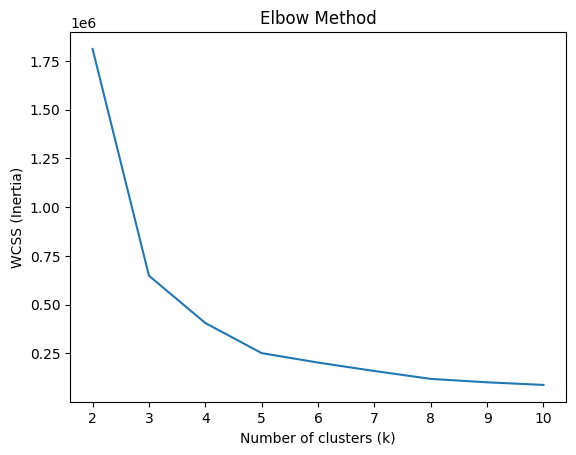

In [32]:
wcss = []
for i in kmeans_results.keys():
    wcss.append(kmeans_results[i]["inertia"])
    
# Plot the Elbow Method graph
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.show()


📊 Creating Multiple K Silhouette Analysis for K-Means (Unscaled)


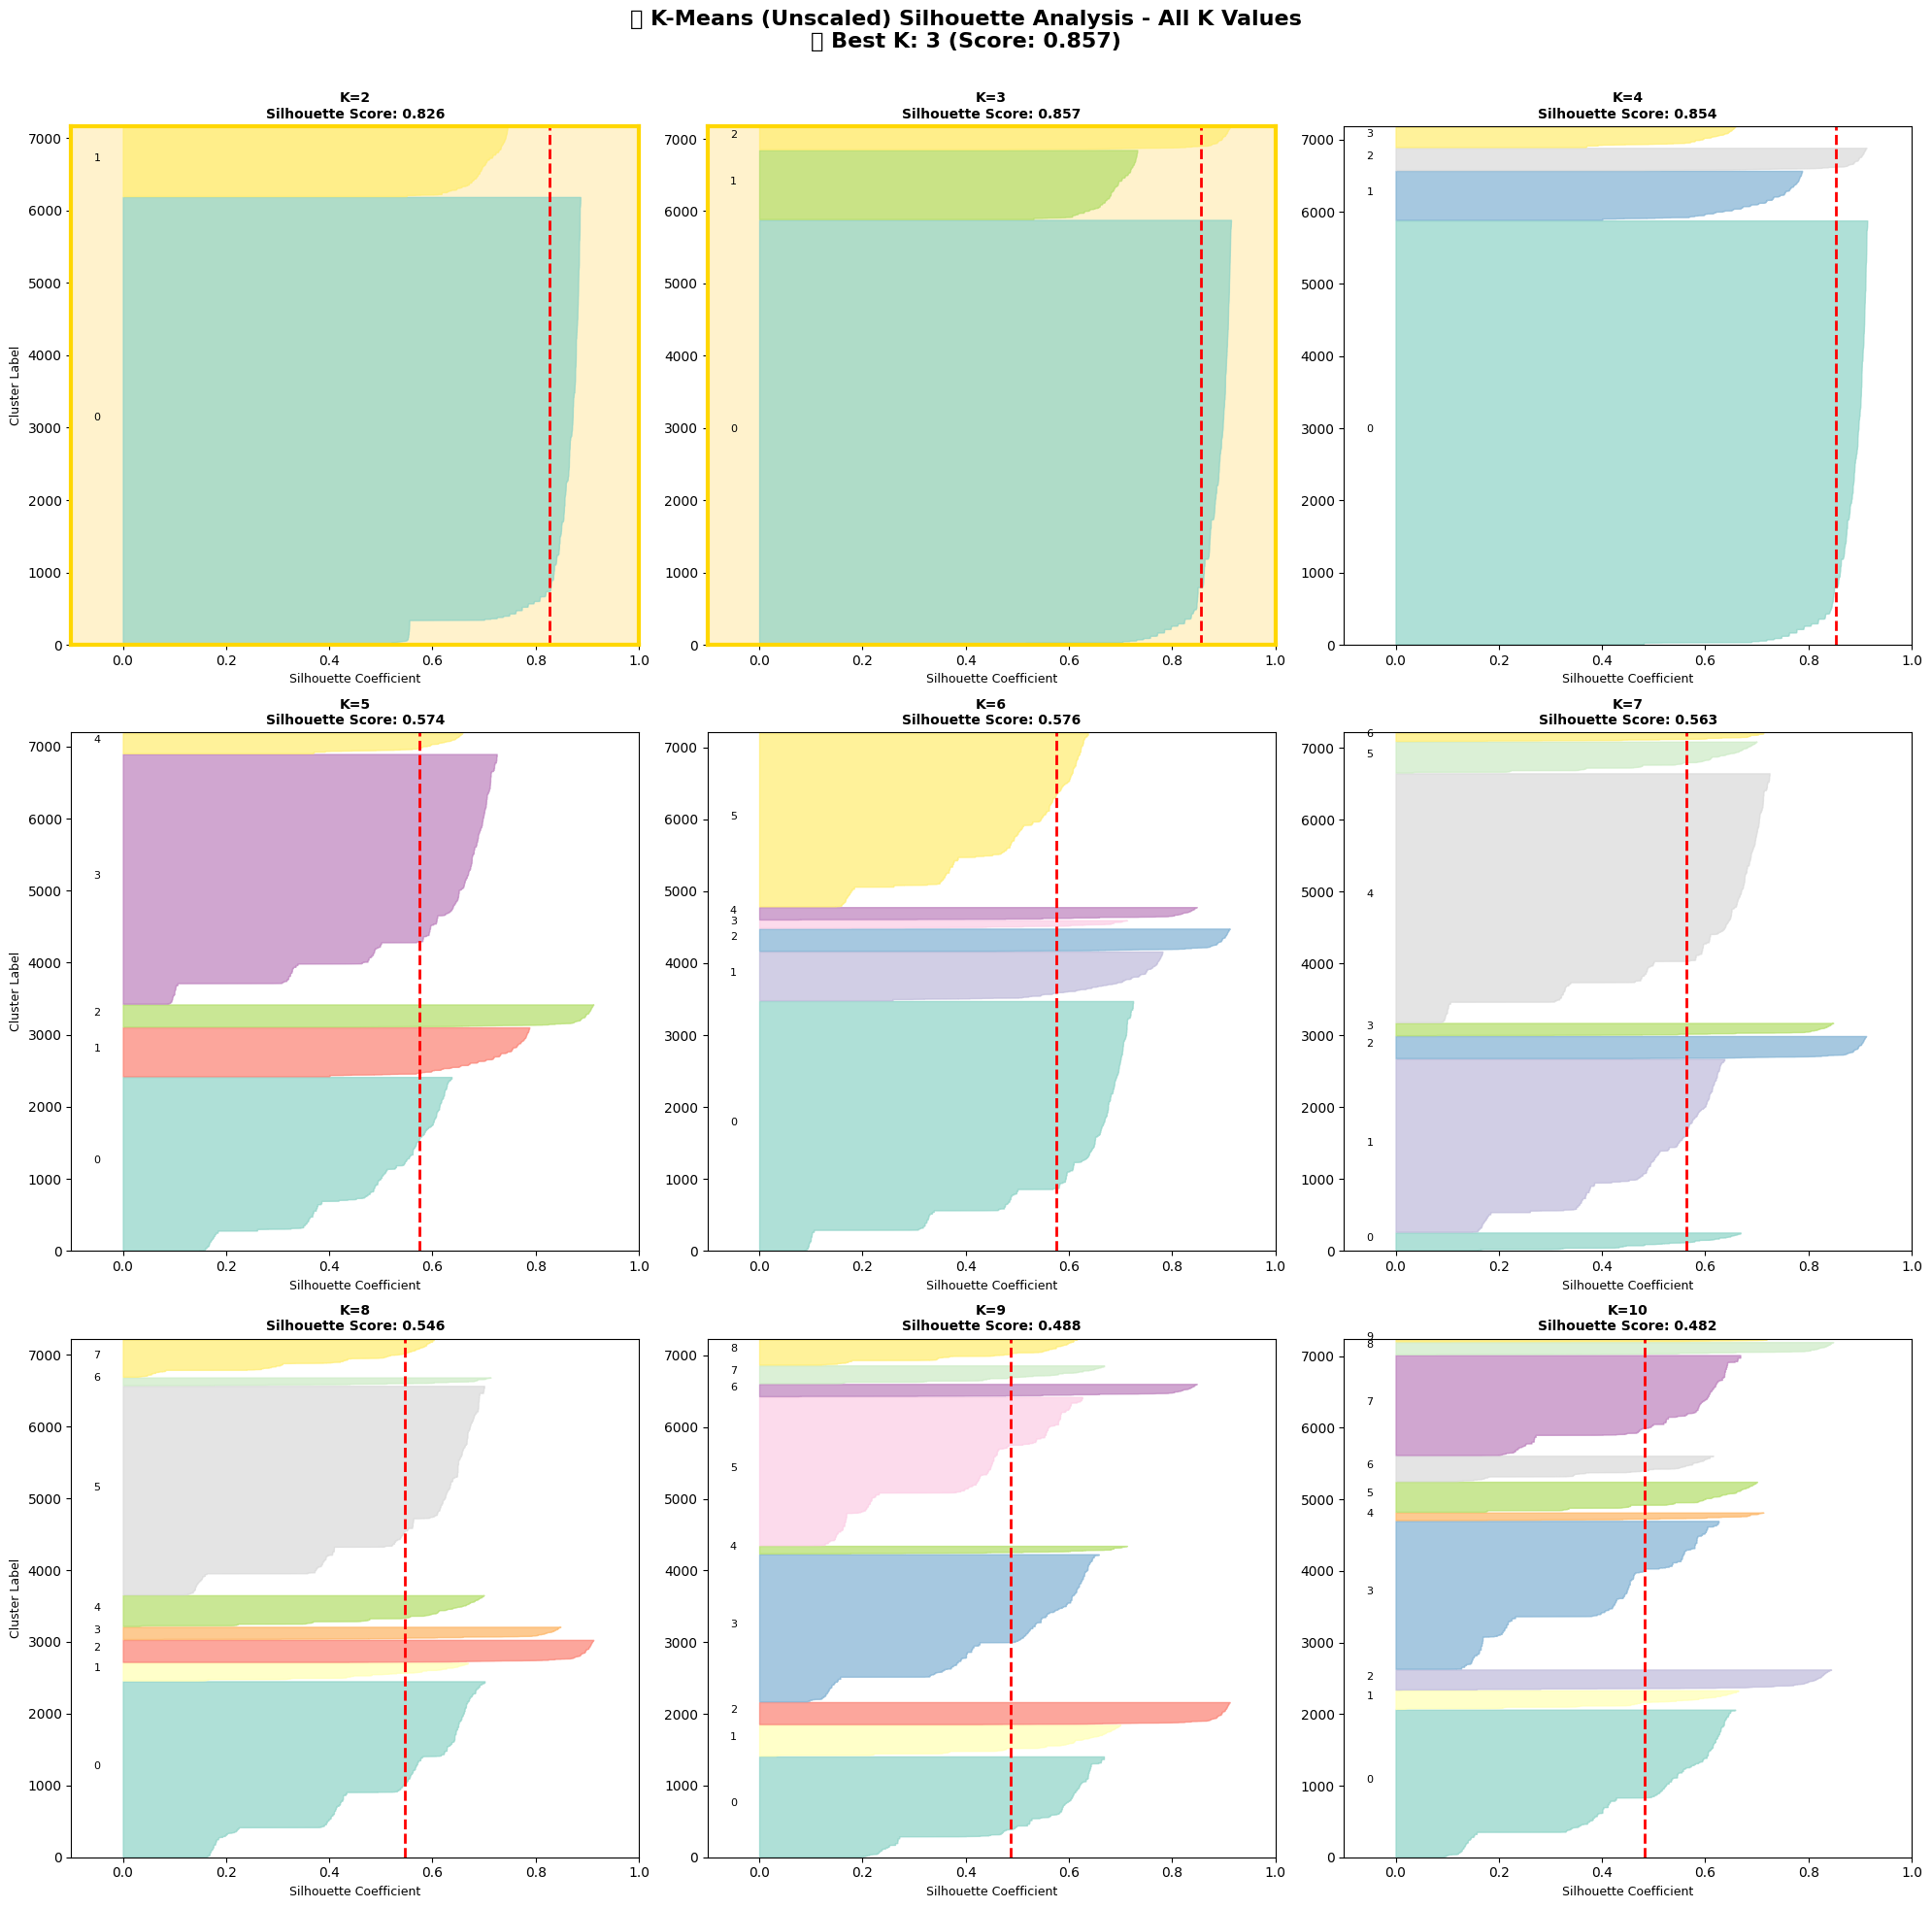

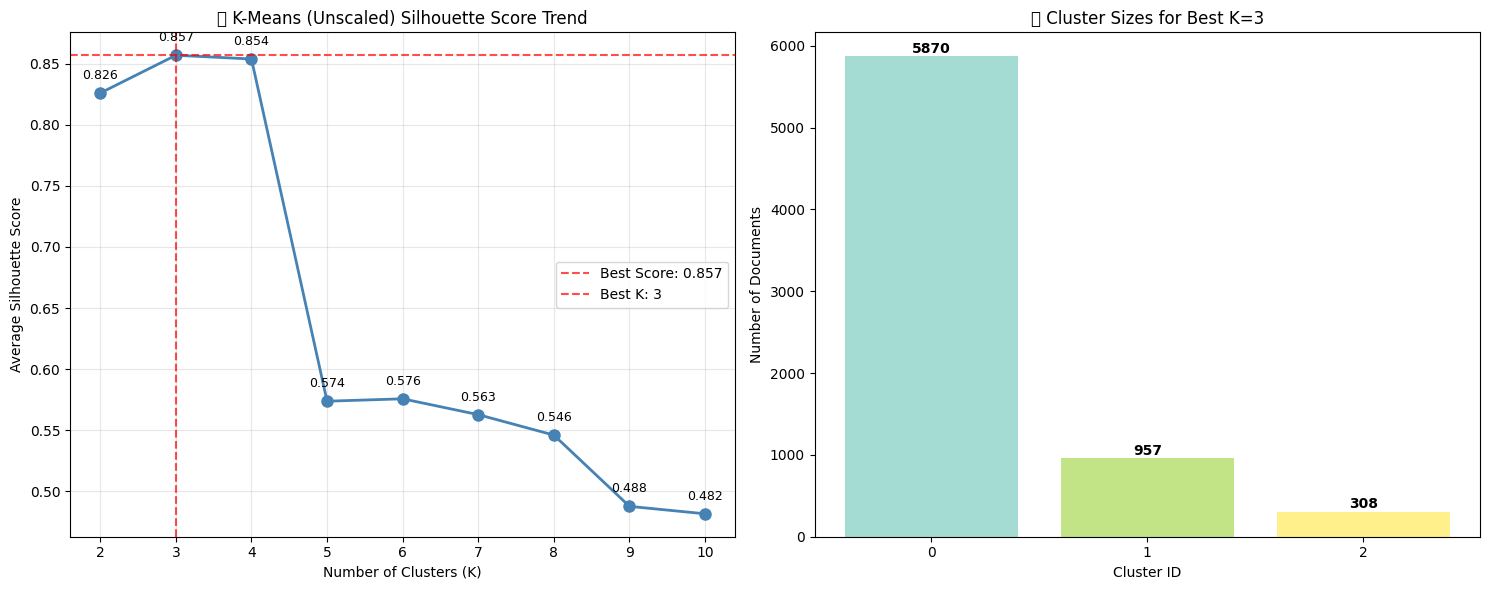


📊 Detailed Analysis for K-Means (Unscaled):
🏆 Best K: 3 (Silhouette Score: 0.857)
📊 K values tested: [2, 3, 4, 5, 6, 7, 8, 9, 10]
📈 Score range: 0.482 - 0.857

📊 All K Results:
   K=2: 0.826    
   K=3: 0.857 🏆 BEST
   K=4: 0.854    
   K=5: 0.574    
   K=6: 0.576    
   K=7: 0.563    
   K=8: 0.546    
   K=9: 0.488    
   K=10: 0.482    

💡 Interpretation Guide:
   • Higher silhouette score = better separated clusters
   • Score > 0.5: Strong cluster structure
   • Score 0.25-0.5: Moderate cluster structure
   • Score < 0.25: Weak cluster structure

✅ Multiple K silhouette analysis completed!
🎯 Recommendation: Consider K=3 for best separation
📊 Creating Multiple K Silhouette Analysis for K-Means (Scaled)


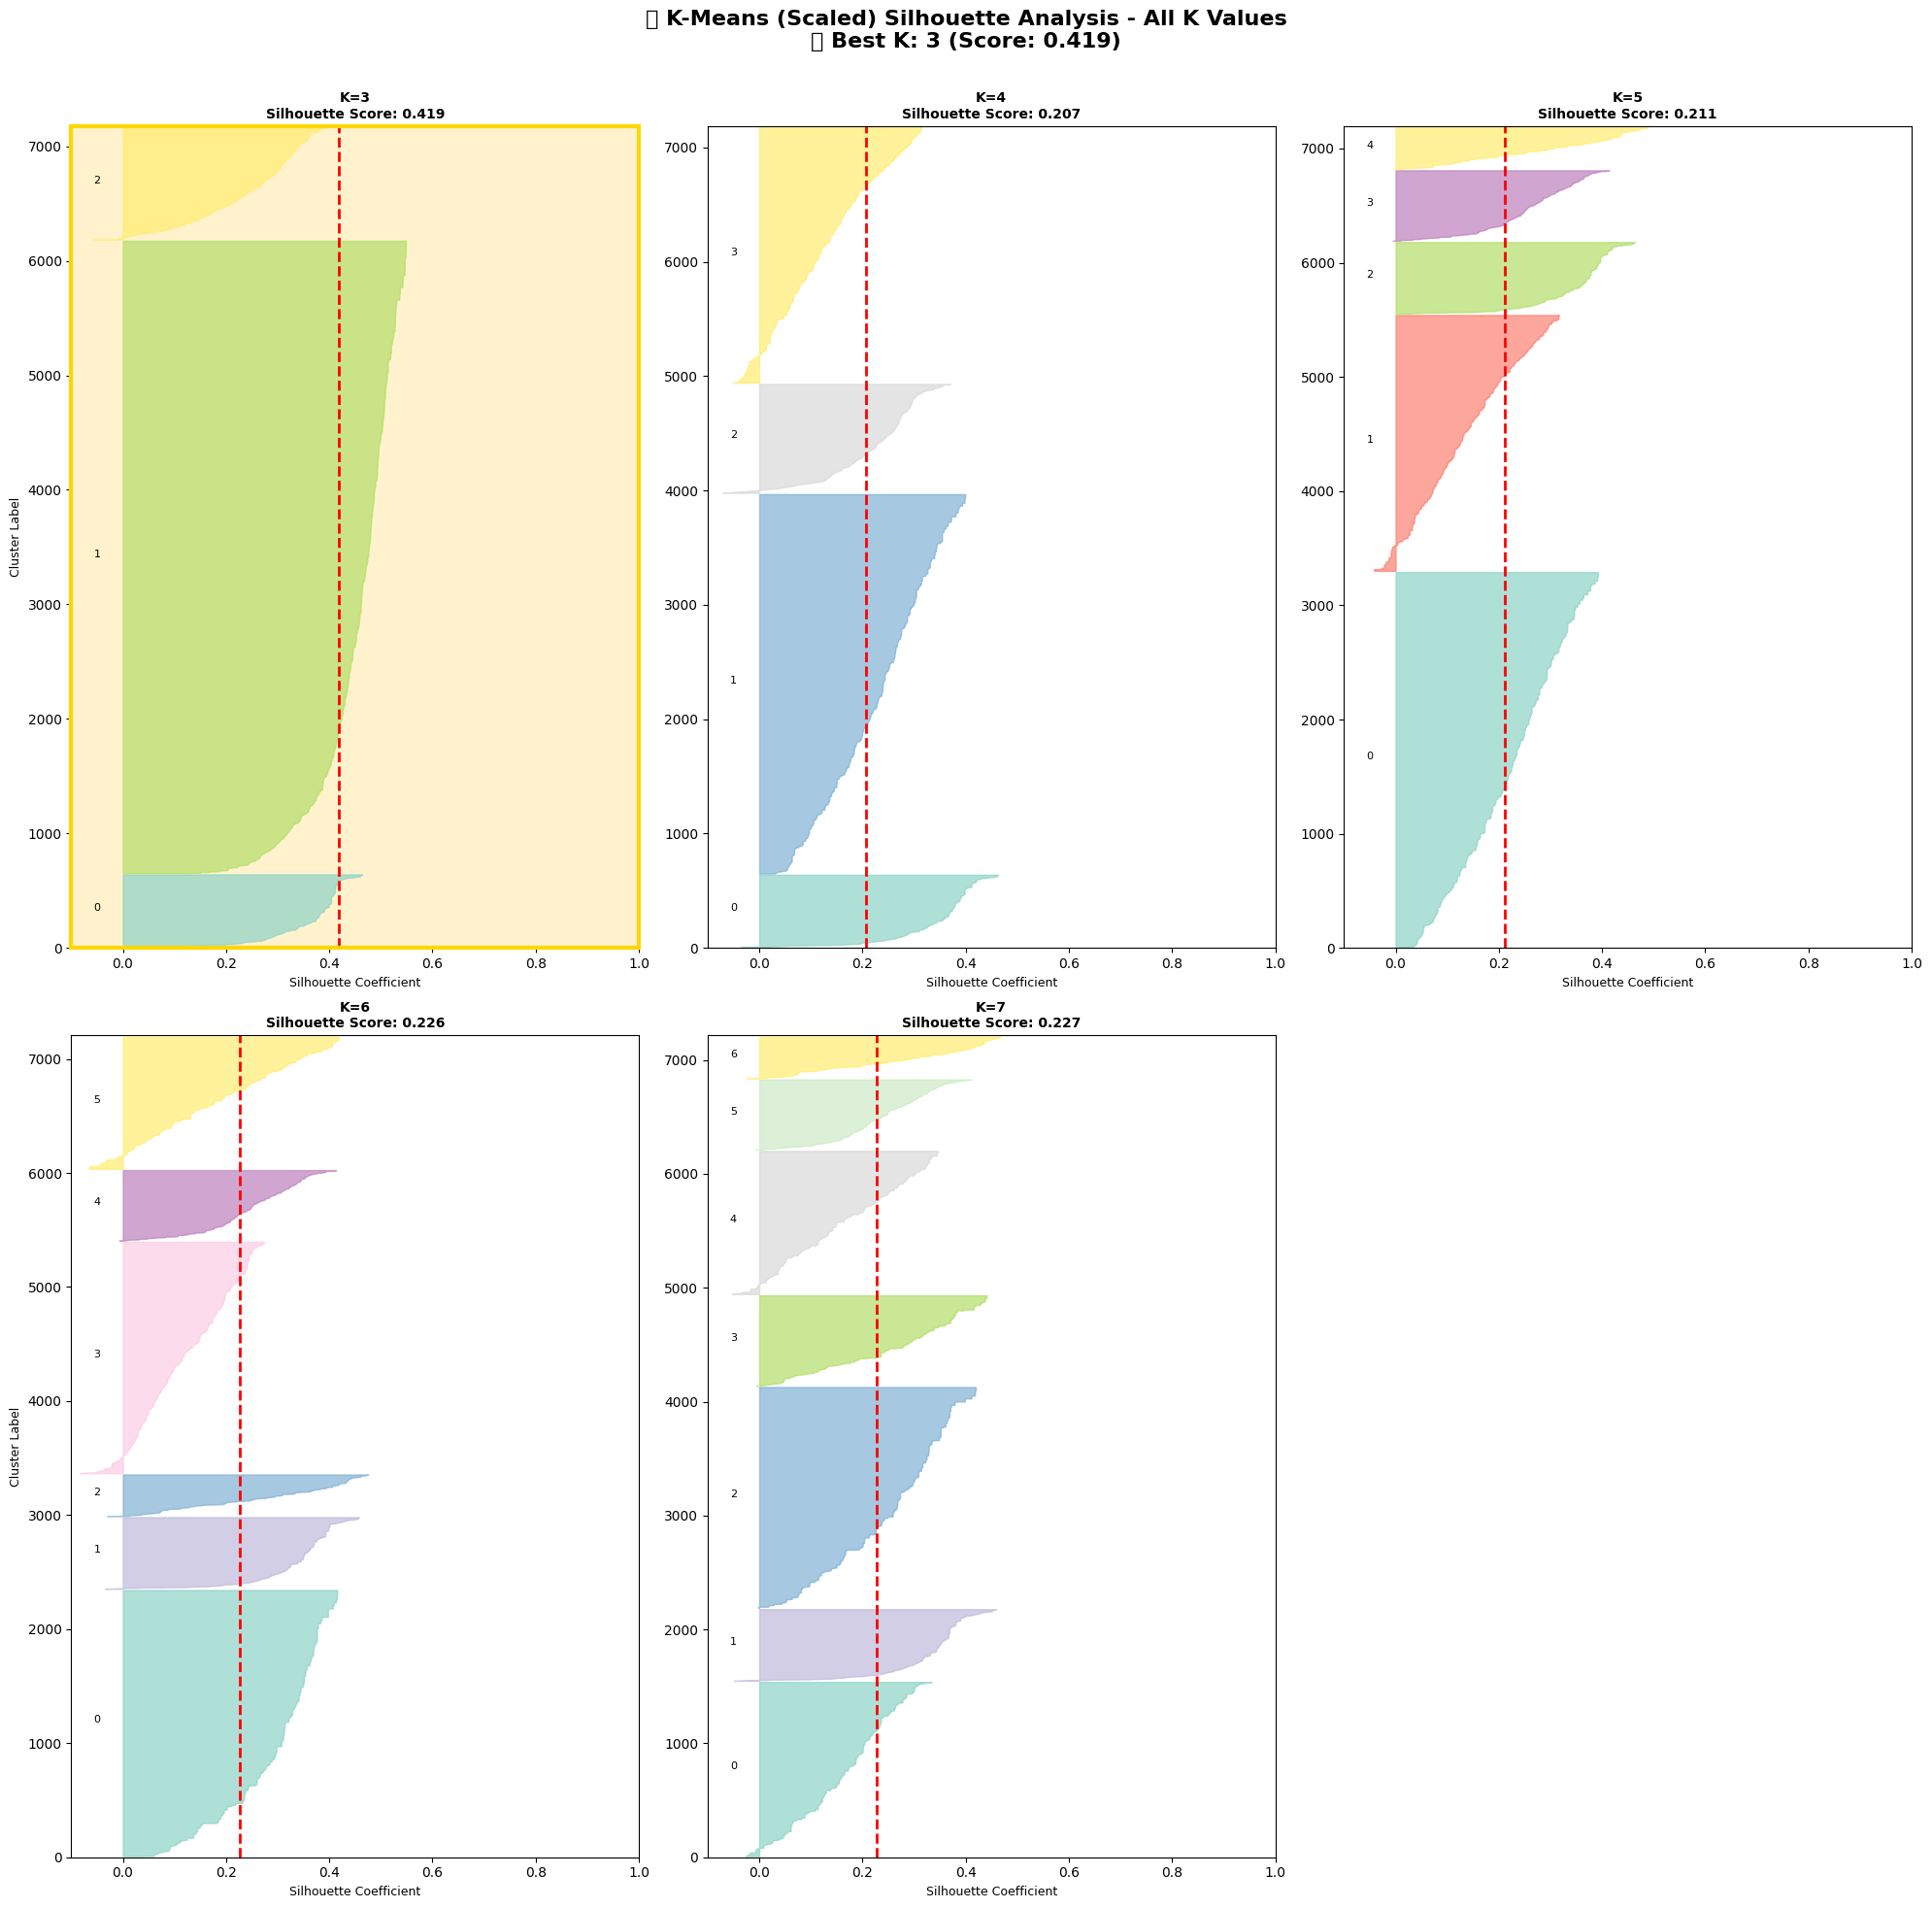

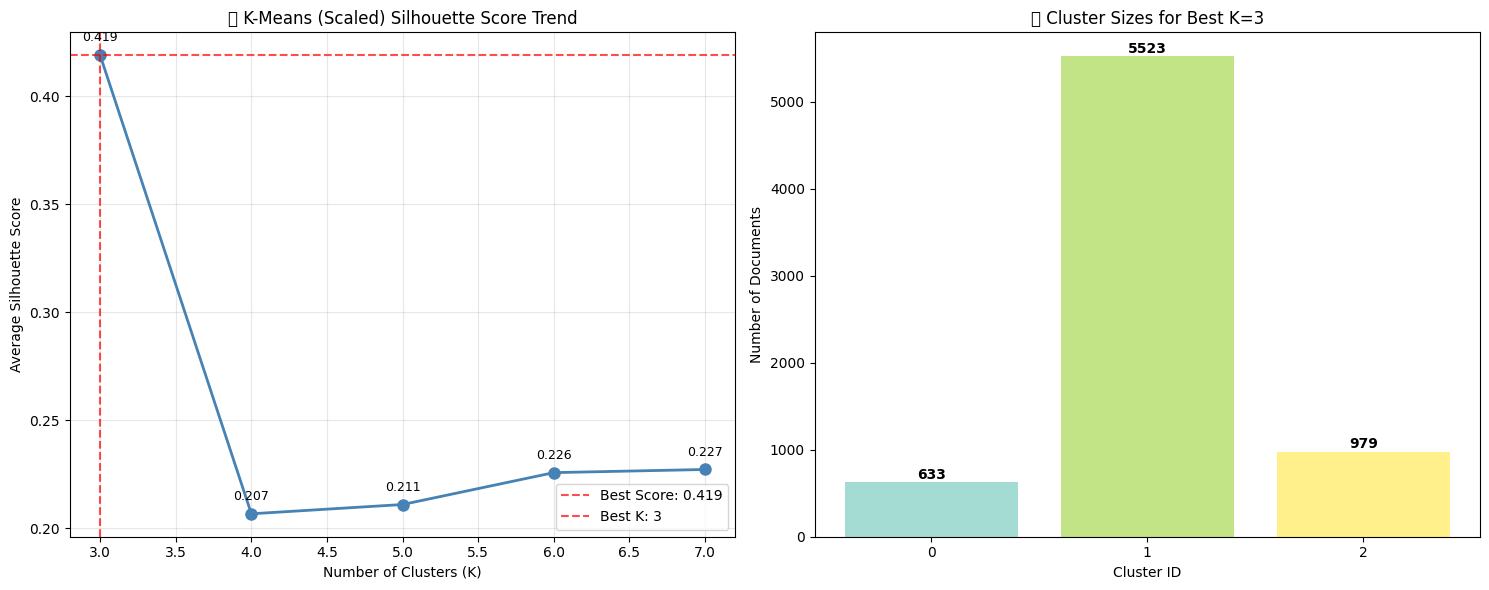


📊 Detailed Analysis for K-Means (Scaled):
🏆 Best K: 3 (Silhouette Score: 0.419)
📊 K values tested: [3, 4, 5, 6, 7]
📈 Score range: 0.207 - 0.419

📊 All K Results:
   K=3: 0.419 🏆 BEST
   K=4: 0.207    
   K=5: 0.211    
   K=6: 0.226    
   K=7: 0.227    

💡 Interpretation Guide:
   • Higher silhouette score = better separated clusters
   • Score > 0.5: Strong cluster structure
   • Score 0.25-0.5: Moderate cluster structure
   • Score < 0.25: Weak cluster structure

✅ Multiple K silhouette analysis completed!
🎯 Recommendation: Consider K=3 for best separation
Best k (Unscaled): 3 | score: 0.8568655643414654
Best k (Scaled): 3 | score: 0.41890954080034853


In [33]:
from utils.visualization_utils import plot_silhouette_analysis_multiple_k

# Phân tích silhouette cho X (unscaled) như cũ
best_k_kmeans, best_score_kmeans = plot_silhouette_analysis_multiple_k(
    X,
    kmeans_results,
    method_name="K-Means (Unscaled)",
    figsize=(20, 20),
)

# Phân tích silhouette cho X_scaled và chọn best_k_scaled
best_k_kmeans_scaled, best_score_kmeans_scaled = plot_silhouette_analysis_multiple_k(
    X_scaled,
    kmeans_scaled_results,
    method_name="K-Means (Scaled)",
    figsize=(20, 20),
)

print("Best k (Unscaled):", best_k_kmeans, "| score:", best_score_kmeans)
print("Best k (Scaled):", best_k_kmeans_scaled, "| score:", best_score_kmeans_scaled)

In [34]:
# Best clustering model (scaled, K = best_k_kmeans_scaled)
kmeans_best = KMeans(
    n_clusters=int(best_k_kmeans_scaled),
    random_state=42,
    n_init=20,
    max_iter=300,
)
kmeans_best.fit(X_scaled)

with open("models/kmeans_best_scaled.pkl", "wb") as f:
    pickle.dump(kmeans_best, f)

In [35]:
kmeans_best.n_features_in_

33

#### KMeans: Scaled

In [36]:
# Sau khi đã có best_k_kmeans_scaled từ phân tích silhouette trên X_scaled,
# dùng nó để fit mô hình KMeans cuối cùng cho pipeline/web.

from sklearn.cluster import KMeans

n_clusters_final = int(best_k_kmeans_scaled)
print(f"Fit KMeans cuối cùng với k = {n_clusters_final} (trên X_scaled)")

kmeans_scaled_best = KMeans(
    n_clusters=n_clusters_final,
    random_state=42,
    n_init=10,
)
cluster_labels_scaled = kmeans_scaled_best.fit_predict(X_scaled)

# Tạo df_with_cluster để phân tích / xuất ra CSV cho web

df_with_cluster = df.copy()
df_with_cluster["cluster_id"] = cluster_labels_scaled

df_with_cluster.head()

Fit KMeans cuối cùng với k = 3 (trên X_scaled)


,id,Tiêu_đề,Giá,Khoảng_giá_min,Khoảng_giá_max,Mô_tả_chi_tiết,Thương_hiệu,Dòng_xe,Năm_đăng_ký,Số_Km_đã_đi,...,price_segment_code,age,clean_text,is_moi,is_do_xe,is_su_dung_nhieu,is_bao_duong,is_do_ben,is_phap_ly,cluster_id
0,6188,Ban xe,2.5,2.50,2.50,"Do mình dư xe không dùng nữa, xe máy móc vẫn c...",Aprilia,2015 Rsv4 R Aprc Abs,2008,20,...,1,17.0,dư xe không xe_máy_móc zin êm_ru thanh_lí gấp ...,0,0,1,0,0,0,2
1,2735,Cần bán chiếc aprillia gt rs200 xe trùm mềm,81.0,81.00,81.00,Xe nhà trùm mềm chỉ đẩy ra đẩy vô nay phụ huyn...,Aprilia,Sr Gt 200,2023,5000,...,2,2.0,xe trùm mềm đẩy đẩy vô phụ_huynh lớn_tuổi đẩy ...,0,0,0,0,0,0,0
2,5791,Bán xe Sr Gt 200 ít sử dụng do đi oto,72.0,69.00,81.00,"Xe biển hcm, ít sử dụng còn rất mới\nLiên hệ: ***",Aprilia,Sr Gt 200,2022,10000,...,2,3.0,xe biển hcm liên_hệ,0,0,0,0,0,0,0
3,839,Nâng cấp CC để lại BMW G310R đk 2023,78.4,72.13,84.67,"Xe tâm huyết rất ít chạy, chi tiết:\n- 15xxx k...",Bmw,Dòng Khác,2023,15600,...,2,2.0,xe tâm_huyết chạy chi_tiết xxx km đk model san...,1,0,0,0,0,0,0
4,3092,BMW GS1250 HP,300.0,189.77,222.77,Bản GS1250 HP - ĐK 2020\nTình trạng xe:\n- Odo...,Bmw,Dòng Khác,2020,20091,...,3,5.0,gs hp đk xe odo km hqcn bs tp hcm khung chống ...,0,0,0,0,0,0,0


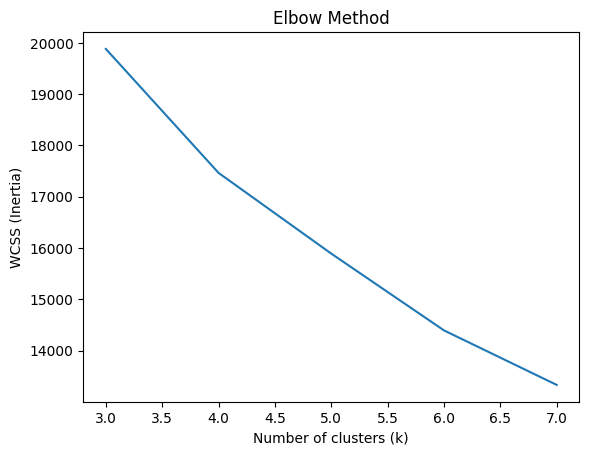

In [37]:
wcss = []
for i in kmeans_scaled_results.keys():
    wcss.append(kmeans_scaled_results[i]["inertia"])
    
# Plot the Elbow Method graph
plt.plot(range(3, 8), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.show()


📊 Creating Multiple K Silhouette Analysis for K-Means


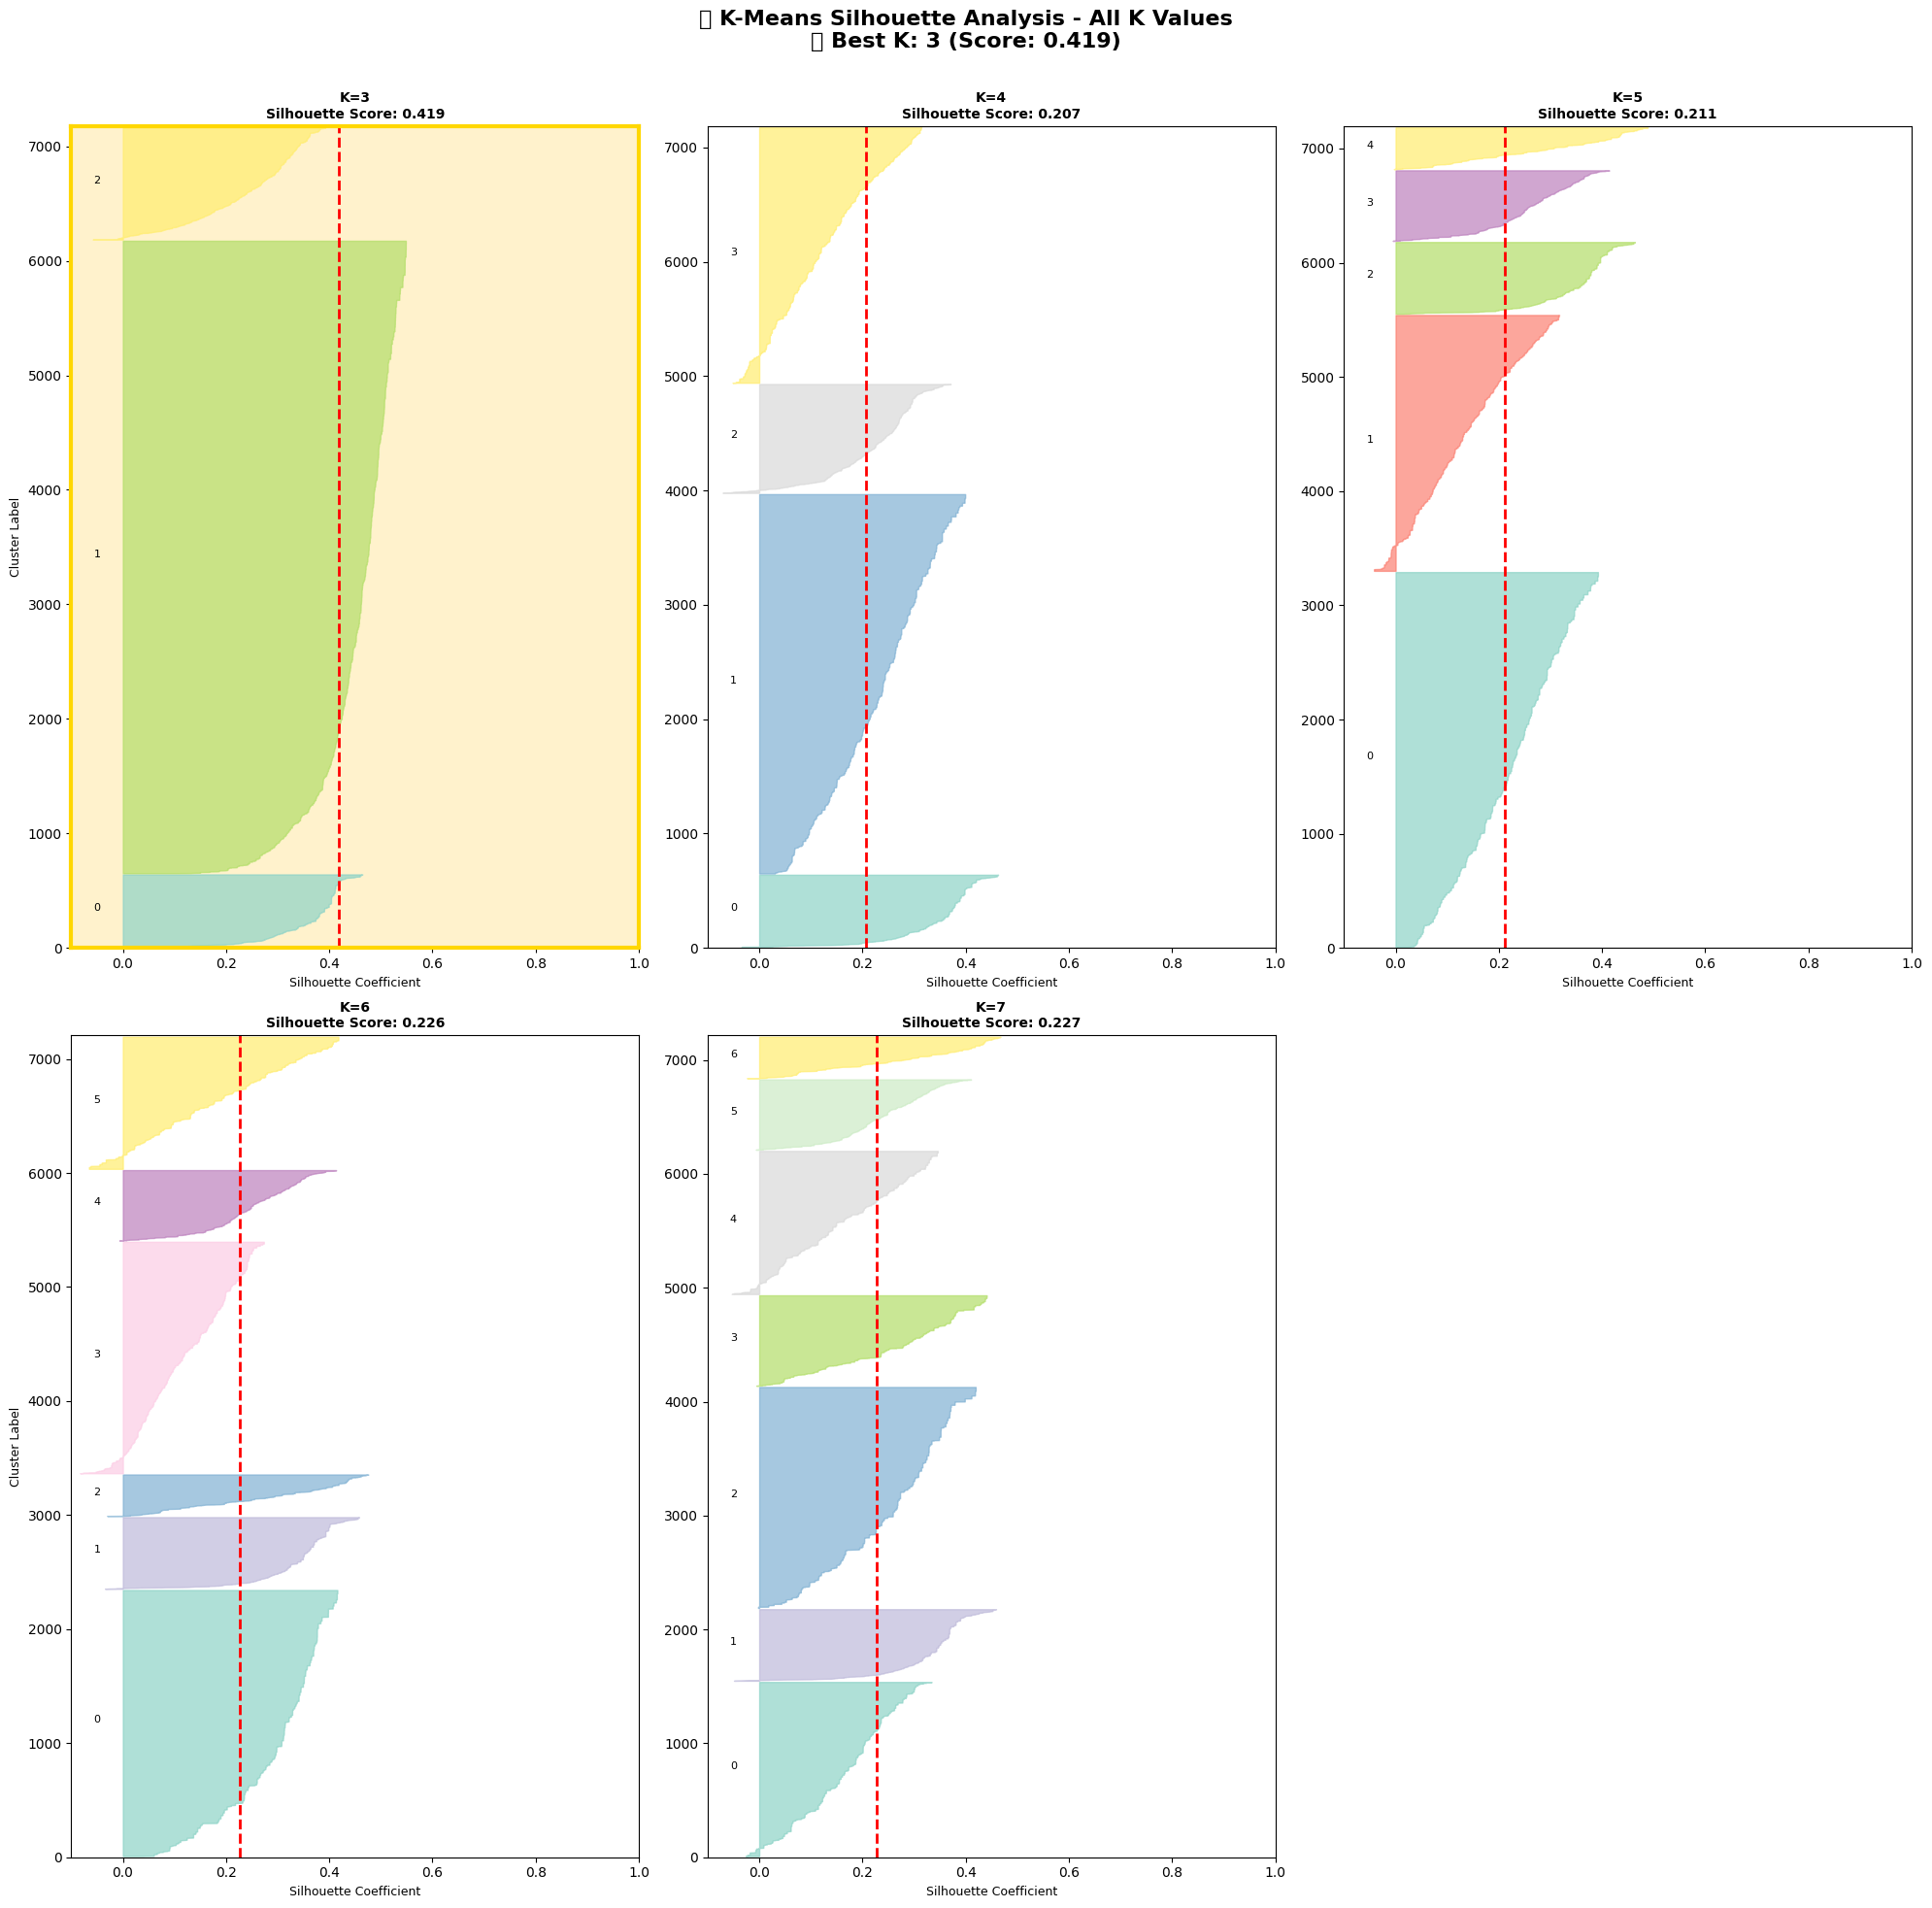

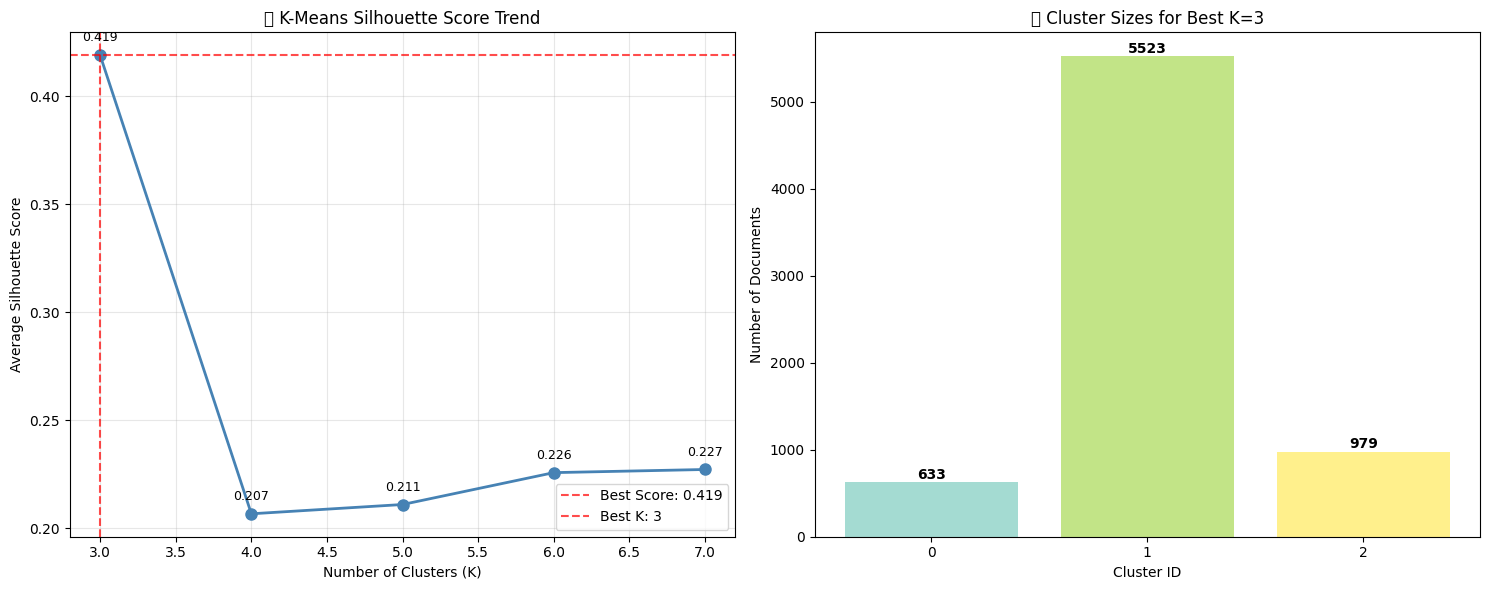


📊 Detailed Analysis for K-Means:
🏆 Best K: 3 (Silhouette Score: 0.419)
📊 K values tested: [3, 4, 5, 6, 7]
📈 Score range: 0.207 - 0.419

📊 All K Results:
   K=3: 0.419 🏆 BEST
   K=4: 0.207    
   K=5: 0.211    
   K=6: 0.226    
   K=7: 0.227    

💡 Interpretation Guide:
   • Higher silhouette score = better separated clusters
   • Score > 0.5: Strong cluster structure
   • Score 0.25-0.5: Moderate cluster structure
   • Score < 0.25: Weak cluster structure

✅ Multiple K silhouette analysis completed!
🎯 Recommendation: Consider K=3 for best separation


In [38]:
from utils.visualization_utils import plot_silhouette_analysis_multiple_k
best_k_kmeans, best_score_kmeans = plot_silhouette_analysis_multiple_k(
    X_scaled,
    kmeans_scaled_results,
    method_name='K-Means',
    figsize=(20, 20)
)

#### GMM

In [ ]:
from utils.clustering_utils import perform_clustering_analysis

print("⭐ Performing GMM clustering analysis...")
gmm_results = perform_clustering_analysis(
    data=X.to_numpy(),
    method='gmm',
    k_range=range(2, 11),
    n_runs=5,
    verbose=True
)

print("⭐ Performing GMM clustering analysis (SCALED X_scaled)...")
gmm_scaled_results = perform_clustering_analysis(
    X_scaled.to_numpy(),
    method="gmm",
    k_range=range(3, 8),  
    n_runs=5,
    verbose=True,
)

⭐ Performing GMM clustering analysis...
🔍 Performing GMM Clustering Analysis
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
📊 Testing k=2...
   Best silhouette score: 0.826
📊 Testing k=3...
   Best silhouette score: 0.857
📊 Testing k=4...
   Best silhouette score: 0.854
📊 Testing k=5...
   Best silhouette score: 0.141
📊 Testing k=6...
   Best silhouette score: 0.115
📊 Testing k=7...
   Best silhouette score: 0.044
📊 Testing k=8...
   Best silhouette score: 0.011
📊 Testing k=9...
   Best silhouette score: -0.048
📊 Testing k=10...
   Best silhouette score: -0.063

✅ GMM clustering analysis completed!
   📊 Tested k values: [2, 3, 4, 5, 6, 7, 8, 9, 10]
   🔄 Runs per k: 5


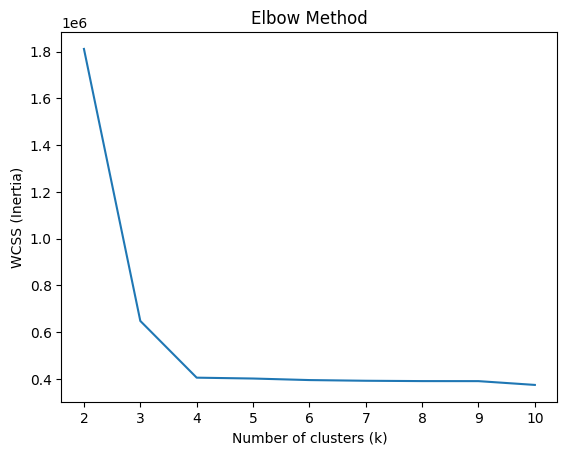

In [40]:
wcss = []
for i in gmm_results.keys():
    wcss.append(gmm_results[i]["inertia"])
    
# Plot the Elbow Method graph
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.show()


📊 Creating Multiple K Silhouette Analysis for GMM


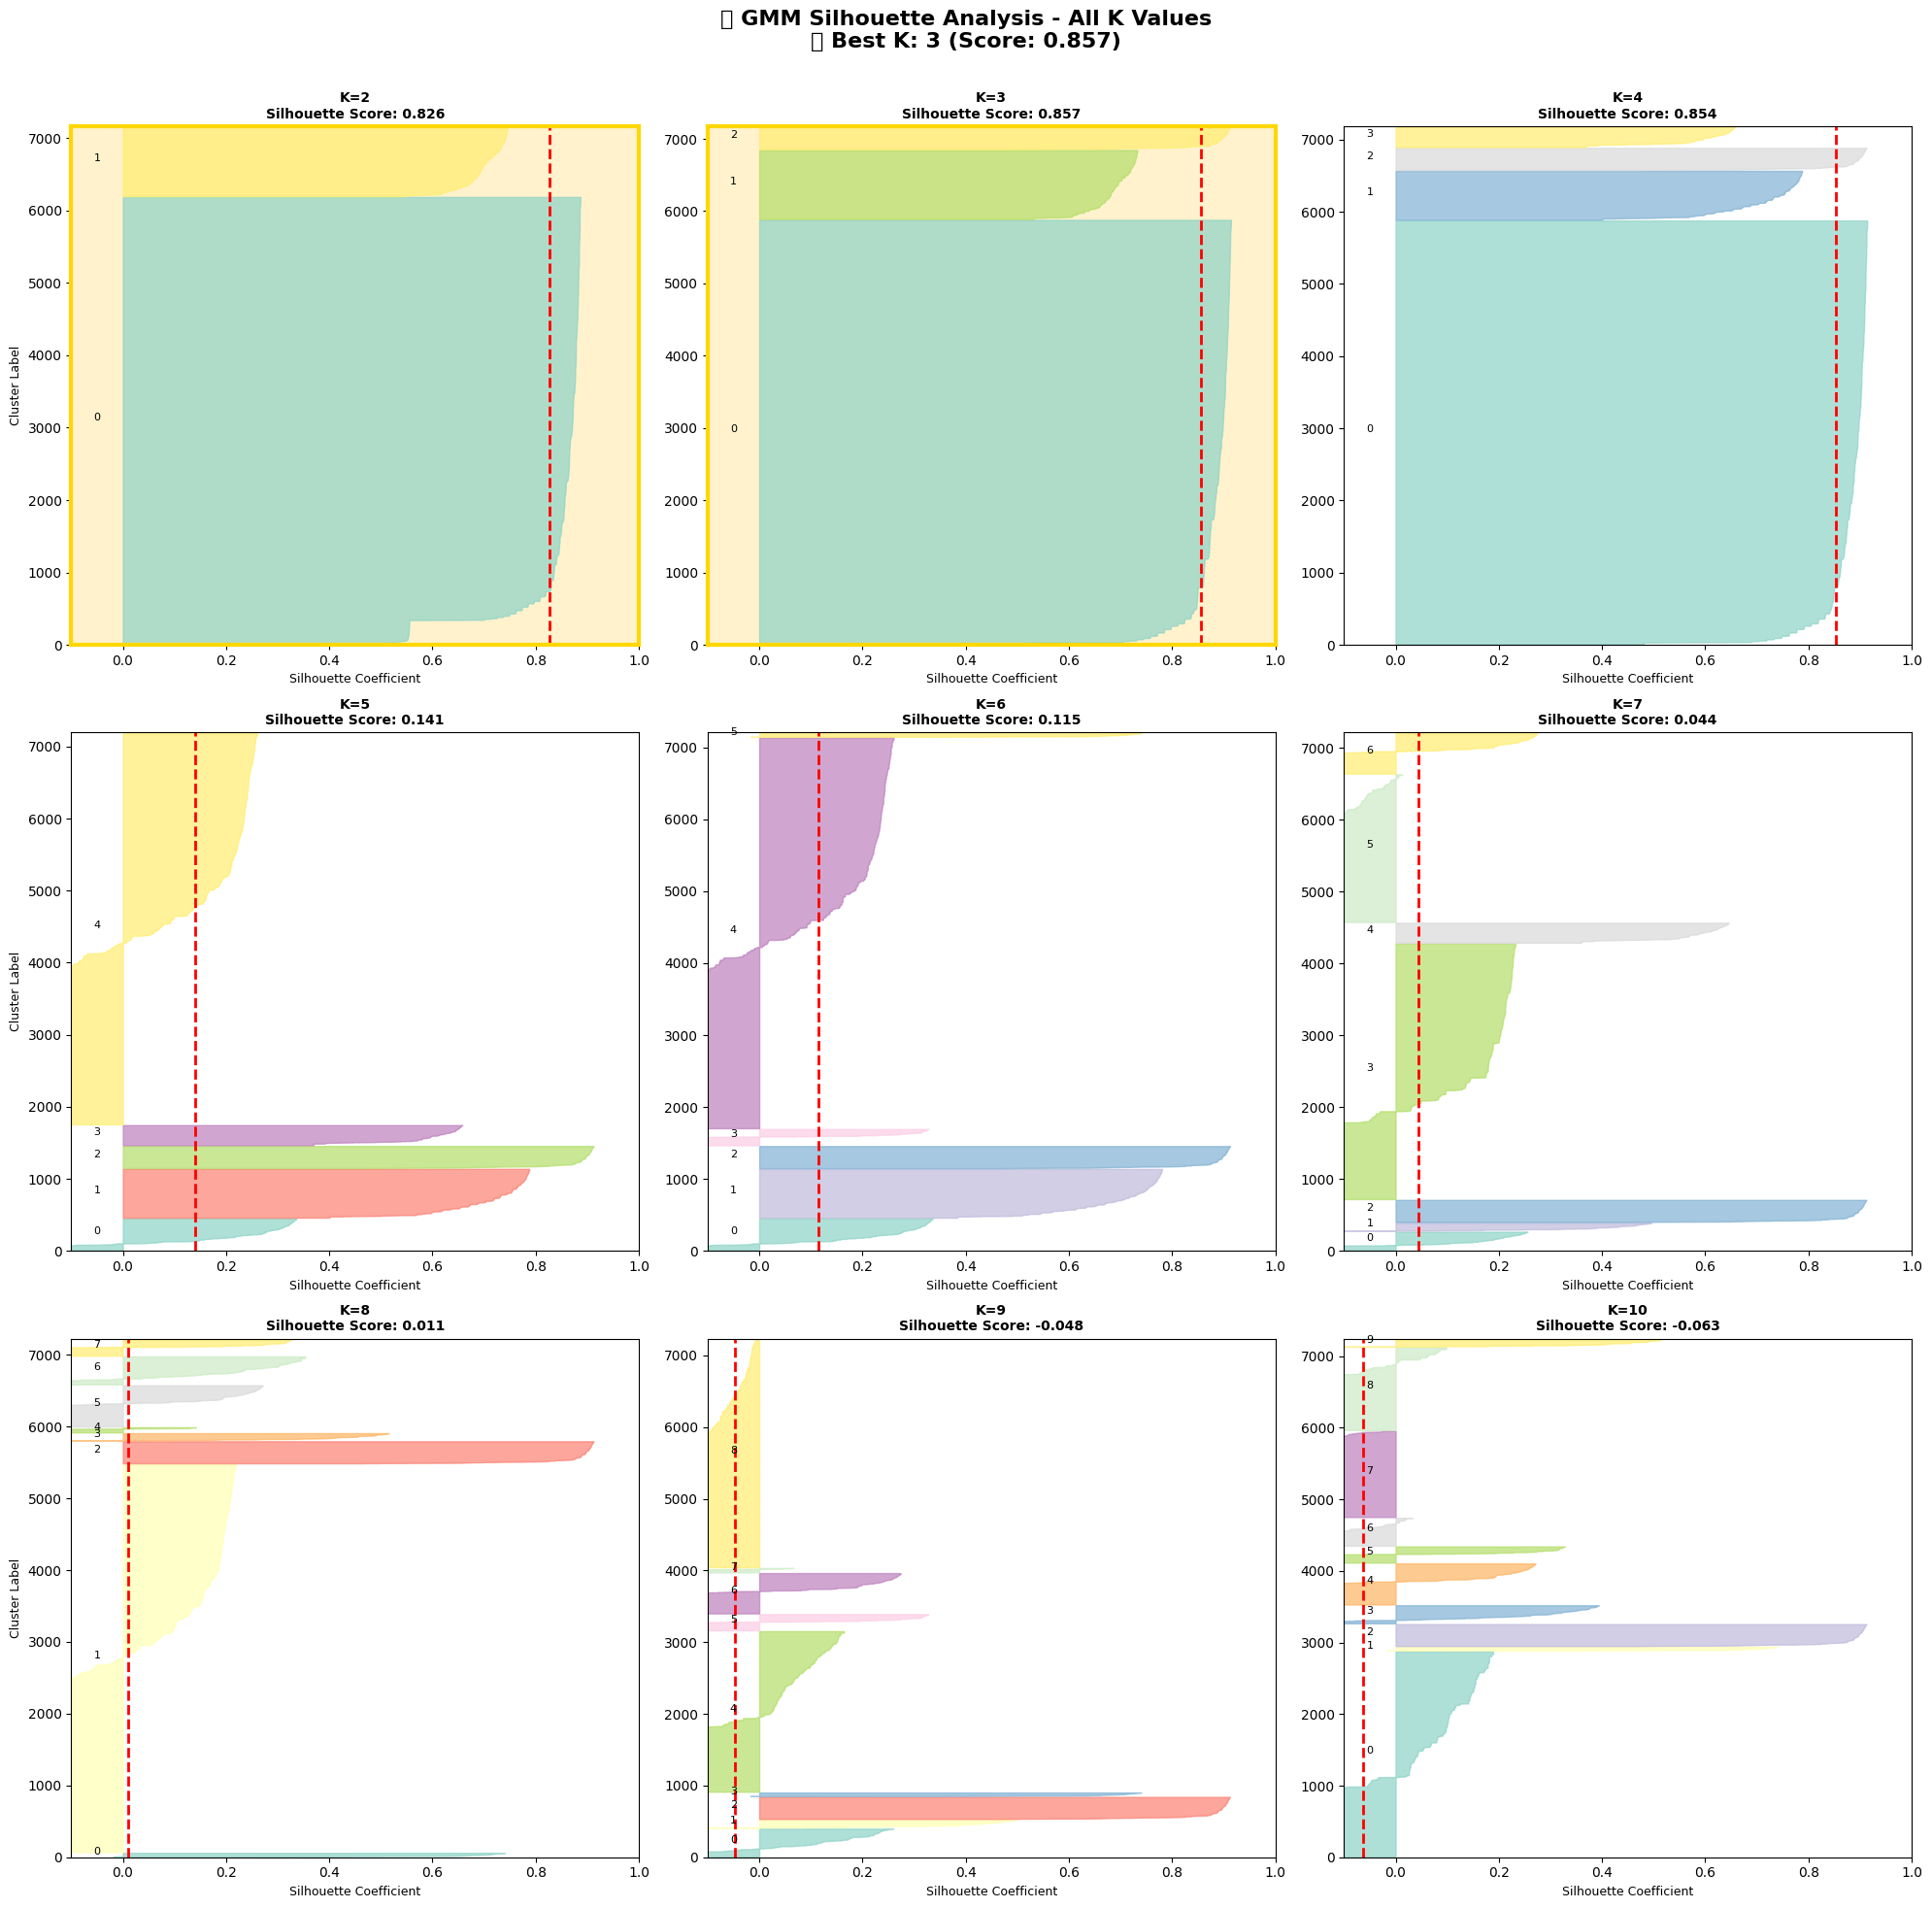

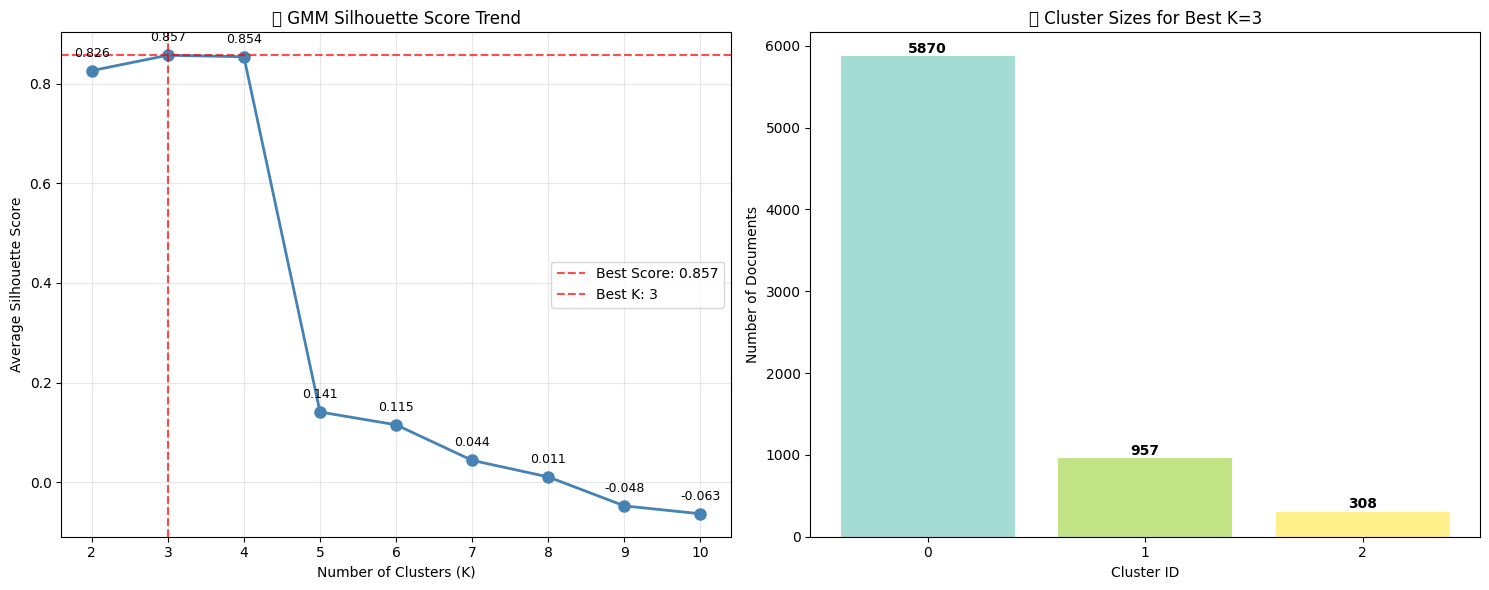


📊 Detailed Analysis for GMM:
🏆 Best K: 3 (Silhouette Score: 0.857)
📊 K values tested: [2, 3, 4, 5, 6, 7, 8, 9, 10]
📈 Score range: -0.063 - 0.857

📊 All K Results:
   K=2: 0.826    
   K=3: 0.857 🏆 BEST
   K=4: 0.854    
   K=5: 0.141    
   K=6: 0.115    
   K=7: 0.044    
   K=8: 0.011    
   K=9: -0.048    
   K=10: -0.063    

💡 Interpretation Guide:
   • Higher silhouette score = better separated clusters
   • Score > 0.5: Strong cluster structure
   • Score 0.25-0.5: Moderate cluster structure
   • Score < 0.25: Weak cluster structure

✅ Multiple K silhouette analysis completed!
🎯 Recommendation: Consider K=3 for best separation


In [ ]:
best_k_gmm, best_score_gmm = plot_silhouette_analysis_multiple_k(
    X, 
    gmm_results, 
    method_name='GMM',
    figsize=(20, 20)
)

# Phân tích silhouette cho X_scaled và chọn best_k_scaled
best_k_gmm_scaled, best_score_gmm_scaled = plot_silhouette_analysis_multiple_k(
    X_scaled,
    gmm_scaled_results,
    method_name="GMM (Scaled)",
    figsize=(20, 20),
)

print("Best k (Unscaled):", best_k_gmm, "| score:", best_score_gmm)
print("Best k (Scaled):", best_k_gmm_scaled, "| score:", best_score_gmm_scaled)

➡️ Nhận xét: 
- Chất lượng vượt trội: GMM (0.857) > gấp 2 lần K-Means (0.419)

- Độ ổn định: GMM cho kết quả ổn định ở K=2,3,4 trong khi K-Means chỉ tốt ở K=3

- Phù hợp với dữ liệu: GMM hoạt động tốt hơn khi dữ liệu có phân phối phức tạp

Kết luận: chọn GMM để phân cụm


# 5. Assess clustering

Đánh giá với GMM

In [ ]:
# Manual selection: Choose K based on silhouette analysis cho X_scaled
chosen_k_gmm = int(best_k_)

# Get the chosen K-Means result trên X_scaled
chosen_kmeans_result = kmeans_scaled_results[chosen_k_kmeans]
kmeans_labels = chosen_kmeans_result["labels"]

print(f"✅ Selected K={chosen_k_kmeans} for K-Means (Scaled) based on silhouette analysis")
print(f"📊 Silhouette Score: {chosen_kmeans_result['silhouette_score']:.3f}")
print(f"📊 Number of clusters: {len(np.unique(kmeans_labels))}")
print(f"📊 Cluster sizes: {np.bincount(kmeans_labels)}")

✅ Selected K=5 for K-Means (Scaled) based on silhouette analysis
📊 Silhouette Score: 0.434
📊 Number of clusters: 5
📊 Cluster sizes: [5729  146  402  442  416]


➡️ Nhận xét: Silhouette ~ 0.434 là chấp nhận được cho dữ liệu phức tạp, nhiều chiều.

Phân bố cụm:
- Cụm 0: 5729 xe (cụm lớn phổ thông).
- Cụm 1: 146 xe.
- Cụm 2: 402 xe.
- Cụm 3: 442 xe.
- Cụm 4: 416 xe.

Kích thước cụm không quá lệch (ngoại trừ 1 cụm lớn, 4 cụm nhỏ hơn), vẫn dùng được để train model cho từng cụm

⌛ Creating beautiful cluster visualizations for K-Means...
🎨 Creating ✨ K-Means Clustering (K=5)


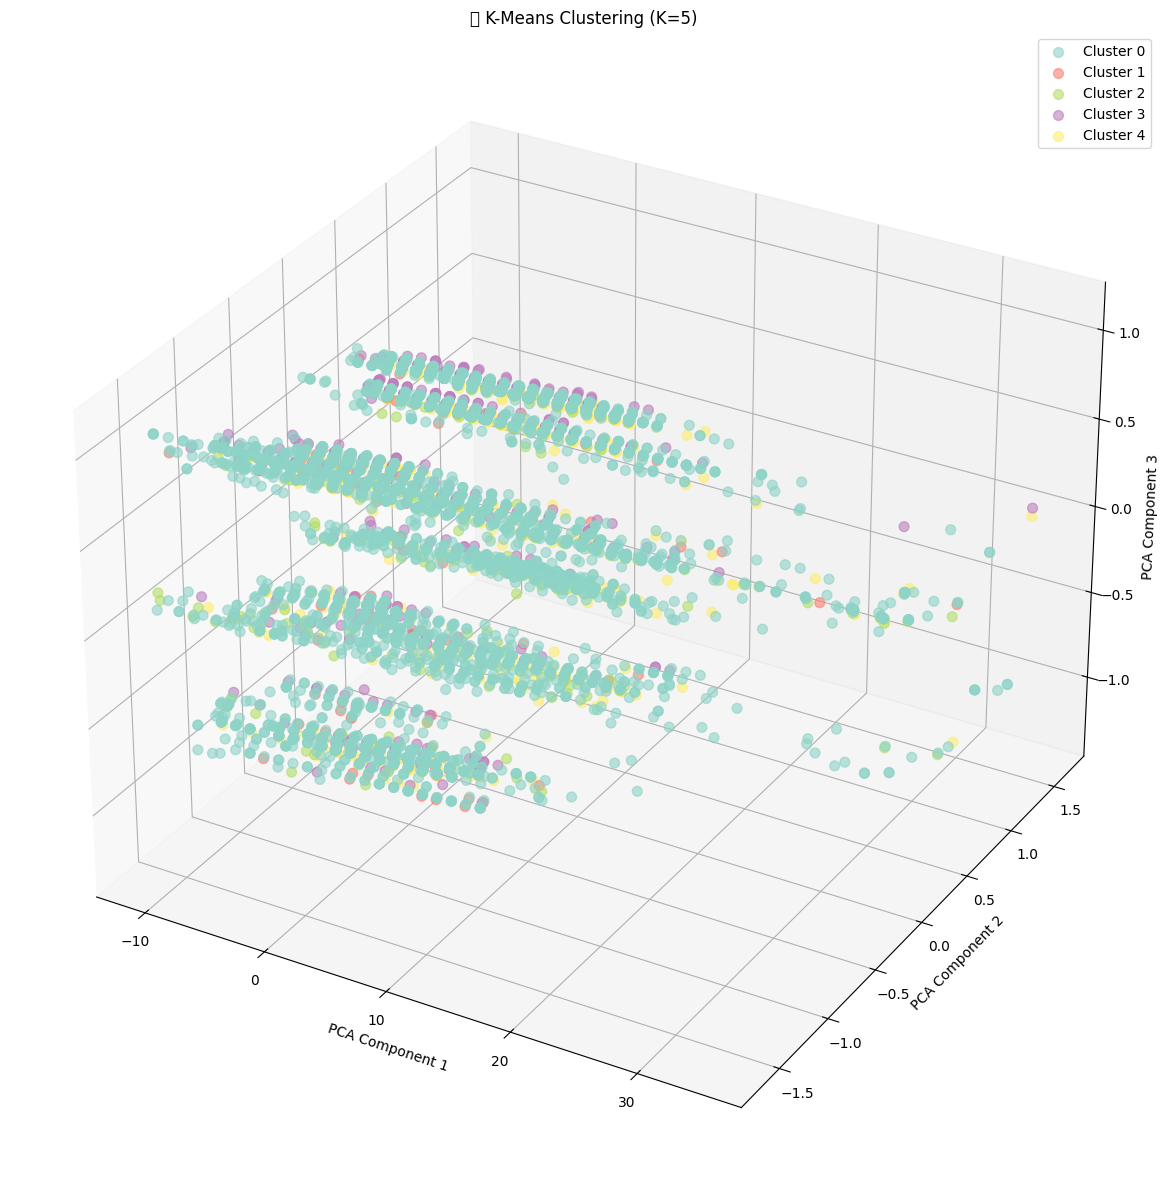

✅ Beautiful cluster visualization completed!


In [48]:
from utils.visualization_utils import plot_beautiful_clusters

print("⌛ Creating beautiful cluster visualizations for K-Means...")
plot_beautiful_clusters(
    X,
    kmeans_labels,
    method='PCA',
    title=f"✨ K-Means Clustering (K={chosen_k_kmeans})"
)

### Compare table side-by-side

In [49]:
# !pip install -e .
import importlib
import utils.clustering_utils

# importlib.reload(utils2)
from utils.clustering_utils import evaluate_clustering_performance
# Train K-Means with optimal k (Scaled)
kmeans_optimal = KMeans(
    n_clusters=int(best_k_kmeans_scaled),
    random_state=42,
    n_init=20,
    max_iter=300,
)
kmeans_optimal.fit(X_scaled)

# Get results
labels_kmeans = kmeans_optimal.labels_
centroids_kmeans = kmeans_optimal.cluster_centers_
inertia_kmeans = kmeans_optimal.inertia_

# Evaluate K-Means performance trên X_scaled
kmeans_metrics = evaluate_clustering_performance(X_scaled, labels_kmeans)

📊 Evaluating Clustering Performance
hi
📊 Clustering Performance Metrics:
   🎯 Silhouette Score: 0.433
   🎯 Davies Bouldin Score 0.950
   🎯 Calinski Harabasz Score: 1341.392
   🎯 Number of Clusters: 5
   📊 Cluster Sizes: [5729  418  146  403  439]
   📊 Size Range: 146 - 5729
   📊 Cluster Balance: 1.509
   📊 Mean Intra-cluster Distance: 2.851
   📊 Mean Inter-cluster Distance: 6.070
   📊 Separation Ratio: 2.129


In [50]:
from sklearn.mixture import GaussianMixture

# Train GMM with optimal k
gmm_optimal = GaussianMixture(n_components=5, random_state=42, max_iter=300, n_init=3)
gmm_optimal.fit(X)

# Get results
labels_gmm = gmm_optimal.predict(X)
probabilities_gmm = gmm_optimal.predict_proba(X)

print(f"✅ GMM Results:")
print(f"   Converged: {gmm_optimal.converged_}")
print(f"   Number of iterations: {gmm_optimal.n_iter_}")
print(f"   Log-likelihood: {gmm_optimal.score(X):.2f}")
print(f"   AIC: {gmm_optimal.aic(X):.2f}")
print(f"   BIC: {gmm_optimal.bic(X):.2f}")

# Evaluate GMM performance
gmm_metrics = evaluate_clustering_performance(X, labels_gmm)

✅ GMM Results:
   Converged: True
   Number of iterations: 10
   Log-likelihood: 128.98
   AIC: -1831931.39
   BIC: -1802351.00
📊 Evaluating Clustering Performance
hi
📊 Clustering Performance Metrics:
   🎯 Silhouette Score: -0.168
   🎯 Davies Bouldin Score 10.821
   🎯 Calinski Harabasz Score: 43.711
   🎯 Number of Clusters: 5
   📊 Cluster Sizes: [2003 3134  429 1423  146]
   📊 Size Range: 146 - 3134
   📊 Cluster Balance: 0.760
   📊 Mean Intra-cluster Distance: 9.122
   📊 Mean Inter-cluster Distance: 2.434
   📊 Separation Ratio: 0.267


In [51]:
# Compare K-Means and GMM side by side
print("🔍 Comparing K-Means and GMM Results:")

comparison_results = {
    'K-Means': {
        'labels': labels_kmeans,
        'centroids': centroids_kmeans,
        'silhouette_score': kmeans_metrics['silhouette_score'],
        'davies_bouldin_score': kmeans_metrics['davies_bouldin_score'],
        'calinski_harabasz_score': kmeans_metrics['calinski_harabasz_score']
    },
    'GMM': {
        'labels': labels_gmm,
        'centroids': gmm_optimal.means_,
        'silhouette_score': gmm_metrics['silhouette_score'],
        'davies_bouldin_score': gmm_metrics['davies_bouldin_score'],
        'calinski_harabasz_score': gmm_metrics['calinski_harabasz_score']
    }
}

🔍 Comparing K-Means and GMM Results:


In [52]:
# Performance comparison table
print("\n📋 Performance Comparison Table:")
print(f"{'Metric':<25} {'K-Means':<12} {'GMM':<12} {'Better':<10}")
print("-" * 65)

metrics_comparison = [
    ('Silhouette Score',
     kmeans_metrics['silhouette_score'],
     gmm_metrics['silhouette_score'],
     'Higher'),
    ('Davies-Bouldin Index',
     kmeans_metrics['davies_bouldin_score'],
     gmm_metrics['davies_bouldin_score'],
     'Lower'),
    ('Calinski-Harabasz Index',
     kmeans_metrics['calinski_harabasz_score'],
     gmm_metrics['calinski_harabasz_score'],
     'Higher')]

for metric, kmeans_val, gmm_val, better in metrics_comparison:
    if better == 'Higher':
        winner = 'K-Means' if kmeans_val > gmm_val else 'GMM'
    else:
        winner = 'K-Means' if kmeans_val < gmm_val else 'GMM'

    print(f"{metric:<25} {kmeans_val:<12.4f} {gmm_val:<12.4f} {winner:<10}")


📋 Performance Comparison Table:
Metric                    K-Means      GMM          Better    
-----------------------------------------------------------------
Silhouette Score          0.4334       -0.1684      K-Means   
Davies-Bouldin Index      0.9499       10.8210      K-Means   
Calinski-Harabasz Index   1341.3923    43.7107      K-Means   


# 6. Cluster features

In [53]:
# 1. Get centroids back in original feature scale
centroids_scaled = kmeans_optimal.cluster_centers_

# 2. Put centroids into a DataFrame
centroids_df = pd.DataFrame(
    centroids_scaled,
    columns=X.columns,
    index=[f"cluster_{i}" for i in range(kmeans_optimal.n_clusters)]
)

# print(centroids_df)       # rows = clusters, cols = features
# If you prefer “features down, clusters across”:
centroids_df = centroids_df.T.loc[important_features]
print(centroids_df)

                               cluster_0     cluster_1     cluster_2  \
E_Thương_hiệu_Yamaha            0.193402  2.224880e-01  3.013699e-01   
E_cc_numeric_137                0.820038  8.373206e-01  8.493151e-01   
E_Dung_tích_xe_Dưới 50 Cc       0.037005  3.349282e-02 -3.469447e-17   
E_Loại_xe_Tay Ga                0.494153  5.406699e-01  2.739726e-01   
E_Dòng_xe_Air Blade             0.085879  9.808612e-02  4.109589e-02   
E_Thương_hiệu_Kymco             0.002967  9.569378e-03 -2.602085e-18   
E_Thương_hiệu_Bmw               0.001396  1.517883e-18 -1.517883e-18   
E_Thương_hiệu_Kawasaki          0.008728  4.784689e-03  2.054795e-02   
E_Dòng_xe_48                    0.000524 -7.589415e-19  6.849315e-03   
age                             0.008488  2.263442e-01 -2.641736e-01   
E_Xuất_xứ_Đức                   0.003491  7.177033e-03  2.168404e-18   
E_Thương_hiệu_Vento             0.000175 -1.897354e-19  1.355253e-19   
E_Thương_hiệu_Piaggio           0.051667  7.416268e-02  6.849315

In [54]:
centroids_df_explain = centroids_df.loc[df_input_num.columns]
centroids_df_explain.T

,is_bao_duong,is_moi,is_phap_ly,is_su_dung_nhieu,is_do_xe,is_do_ben,age
cluster_0,-0.022074,-0.272739,-0.013744,-0.247233,-0.144534,-0.262819,0.008488
cluster_1,0.026151,-0.103106,-0.059849,-0.247233,-0.144534,3.804895,0.226344
cluster_2,0.262694,0.051035,0.124356,-0.012056,6.918805,-0.095653,-0.264174
cluster_3,-0.046597,-0.028368,-0.103062,4.044762,-0.144534,0.100550,0.116203
cluster_4,0.218577,3.666513,0.289601,-0.247233,-0.144534,-0.253554,-0.345106


In [55]:
import pandas as pd

# Turn cluster centers into DataFrame
centers_df = pd.DataFrame(
    kmeans_optimal.cluster_centers_,
    columns=X.columns
)

# Function to summarize one categorical feature for all clusters
def describe_category(centers_df, cat_prefix, categories, dropped_first=True):
    """
    cat_prefix: prefix of OHE columns, e.g. 'E_Xuất_xứ_'
    categories: list of original categories in correct order, e.g.
                ['Trung Quốc', 'Nhật Bản', 'Việt Nam']
    dropped_first: True if OneHotEncoder(drop='first')
    """
    # Find OHE columns for this categorical feature
    ohe_cols = [c for c in centers_df.columns if c.startswith(cat_prefix)]
    # Assuming order corresponding to categories[1:], if drop='first'
    result = {}
    for k in range(centers_df.shape[0]):   # each cluster
        vals = centers_df.loc[k, ohe_cols].values
        if dropped_first:
            probs = [1 - vals.sum()] + list(vals)   # first category = baseline
        else:
            probs = list(vals)
        result[k] = dict(zip(categories, probs))
    return result

for item in original_important_features:
    if item not in df_input_num.columns:
        print(item)
        # Example use
        categories = [i for i in encoded_input_cate.columns if i.startswith(f"E_{item}")]
        xuatsu_summary = describe_category(
            centers_df,
            cat_prefix=f"E_{item}",
            categories=categories,
            dropped_first=False
        )

        for k, dist in xuatsu_summary.items():
            print(f"\nCluster {k}:")
            for cat, p in dist.items():
                print(f"  {cat}: {p:.2f}")
        print("-"*60)


Dung_tích_xe

Cluster 0:
  E_Dung_tích_xe_50 - 100 Cc: 0.04
  E_Dung_tích_xe_Dưới 50 Cc: 0.10
  E_Dung_tích_xe_Không Biết Rõ: 0.04

Cluster 1:
  E_Dung_tích_xe_50 - 100 Cc: 0.03
  E_Dung_tích_xe_Dưới 50 Cc: 0.08
  E_Dung_tích_xe_Không Biết Rõ: 0.05

Cluster 2:
  E_Dung_tích_xe_50 - 100 Cc: -0.00
  E_Dung_tích_xe_Dưới 50 Cc: 0.05
  E_Dung_tích_xe_Không Biết Rõ: 0.10

Cluster 3:
  E_Dung_tích_xe_50 - 100 Cc: 0.10
  E_Dung_tích_xe_Dưới 50 Cc: 0.12
  E_Dung_tích_xe_Không Biết Rõ: 0.01

Cluster 4:
  E_Dung_tích_xe_50 - 100 Cc: 0.03
  E_Dung_tích_xe_Dưới 50 Cc: 0.03
  E_Dung_tích_xe_Không Biết Rõ: 0.05
------------------------------------------------------------
cc_numeric

Cluster 0:
  E_cc_numeric_75: 0.82
  E_cc_numeric_137: 0.10
  E_cc_numeric_200: 0.04

Cluster 1:
  E_cc_numeric_75: 0.84
  E_cc_numeric_137: 0.08
  E_cc_numeric_200: 0.05

Cluster 2:
  E_cc_numeric_75: 0.85
  E_cc_numeric_137: 0.05
  E_cc_numeric_200: 0.10

Cluster 3:
  E_cc_numeric_75: 0.76
  E_cc_numeric_137: 0.12
  E_c

# 7. Test with 10 random samples

In [56]:
n_samples = 10
rng = np.random.default_rng(42)

# Build 10 synthetic samples: each feature drawn from its original column values
new_samples_df = pd.DataFrame({
    col: df[col].sample(n=n_samples, replace=True, random_state=42).to_numpy()
    for col in df.columns
})

print("New synthetic samples:")
print(new_samples_df)


New synthetic samples:
     id                                      Tiêu_đề   Giá  Khoảng_giá_min  \
0   850                            CB 400 cho anh em  45.0           24.84   
1  2930             Joyride Fi bản 2 mắt bstp zin êm   3.6            3.23   
2  2921  Thanh lý xe Attila đĩa bay năm 2010 màu nâu   3.0            3.11   
3  6664                         Cần bán nhanh xe sym   5.5            9.56   
4  4063       Vave Đời 2002 Honda Vn Lốc Đen , Jin ,  12.5            9.95   
5   157                 Bán xe Vision đã qua sử dụng  26.0           24.45   
6   266                Cần nhượng lại xe Tay Ga 50cm  14.0            7.36   
7  7013         Ex côn tự động máy 65zz k9c btc bstp  26.8           14.95   
8  3351       airblade 2017 bstp chính chủ bán nhanh  21.0           21.00   
9   372      atila Elizabeth màu hồng thắng đĩa BSTP   4.0            3.96   

   Khoảng_giá_max                                     Mô_tả_chi_tiết  \
0           29.16  xe đời nhà Minh \nđến xem x

# 8. Train model by cluster

## Split to multiple dataframes by clusters

In [57]:
# 1. Attach cluster labels to the dataframe
df_with_cluster = X.copy()
df_with_cluster["cluster"] = labels_kmeans

# 2. Split into multiple dataframes (one per cluster)
dfs_by_cluster = {cluster_id: sub_df.drop(columns="cluster")
                  for cluster_id, sub_df in df_with_cluster.groupby("cluster")}


# 1. Attach cluster labels to the dataframe
y_with_cluster = df[["Giá"]]
y_with_cluster["cluster"] = labels_kmeans

# 2. Split into multiple dataframes (one per cluster)
y_by_cluster = {cluster_id: sub_df.drop(columns="cluster")
                  for cluster_id, sub_df in y_with_cluster.groupby("cluster")}


In [58]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# Define models to compare
models = [
    ('LinearRegression', LinearRegression()),
    ('DecisionTreeRegressor', DecisionTreeRegressor(random_state=40)),
    ('RRandomForestRegressor', RandomForestRegressor(random_state=40)),
    ('SVR-rbf', SVR(kernel='rbf')),
    ('SVR-linear', SVR(kernel='rbf')),
    ('SVR-sigmoid', SVR(kernel='sigmoid')),
    ('KNeighborsRegressor', KNeighborsRegressor(n_neighbors=5)),
    ('AdaBoostRegressor', AdaBoostRegressor(random_state=40))
]


print(f"Models to compare: {[name for name, _ in models]}")

Models to compare: ['LinearRegression', 'DecisionTreeRegressor', 'RRandomForestRegressor', 'SVR-rbf', 'SVR-linear', 'SVR-sigmoid', 'KNeighborsRegressor', 'AdaBoostRegressor']


In [59]:
# 7. So sánh nhiều mô hình dự đoán giá cho từng cụm và chọn mô hình tốt nhất

from sklearn.preprocessing import RobustScaler
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.model_selection import cross_val_score
import numpy as np


# Giả định bạn đã có:
# - dfs_by_cluster: dict {cluster_id: X_cluster}
# - y_by_cluster: dict {cluster_id: y_cluster_with_price_column}
# - models: list[(name, model_instance)] các model regression muốn so sánh

best_models_by_cluster = {}
best_scalers_by_cluster = {}

for cluster_id in dfs_by_cluster:
    print("-" * 50)
    print(f"CLUSTER {cluster_id}")

    # 1. Chuẩn bị dữ liệu
    X_cluster = dfs_by_cluster[cluster_id]
    y_cluster = y_by_cluster[cluster_id]["Giá"]

    print("Kích thước X_cluster:", X_cluster.shape)
    print("Kích thước y_cluster:", y_cluster.shape)

    # 2. Train-test split
    print("1. Train test split")
    X_train, X_test, y_train, y_test = train_test_split(
        X_cluster,
        y_cluster,
        test_size=0.20,
        random_state=40,
    )

    print(f"Training set size: {X_train.shape[0]}")
    print(f"Test set size: {X_test.shape[0]}")

    # 3. Scale dữ liệu (sử dụng RobustScaler cho tất cả biến số)
    print("2. Scale train data")
    numerical_columns = X_cluster.columns.to_list()

    scaler = SklearnTransformerWrapper(
        RobustScaler(),
        variables=numerical_columns,
    )

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 4. So sánh nhiều mô hình bằng cross-validation cho từng thước đo
    print("3. So sánh mô hình theo R2, RMSE, MAE")
    model_instances = [model for name, model in models]
    model_names = [name for name, model in models]

    rows_r2 = []
    rows_rmse = []
    rows_mae = []

    for name, model in zip(model_names, model_instances):
        print(f"Đánh giá model: {name}")

        # R2
        scores_r2 = cross_val_score(
            model,
            X_train_scaled,
            y_train,
            cv=10,
            scoring="r2",
        )
        rows_r2.append(
            {
                "Model": name,
                "Mean_r2": np.mean(scores_r2),
                "Std_r2": np.std(scores_r2),
            }
        )

        # RMSE (neg_root_mean_squared_error -> đổi dấu)
        scores_rmse = cross_val_score(
            model,
            X_train_scaled,
            y_train,
            cv=10,
            scoring="neg_root_mean_squared_error",
        )
        mean_rmse = -np.mean(scores_rmse)
        std_rmse = np.std(scores_rmse)
        rows_rmse.append(
            {
                "Model": name,
                "Mean_rmse": mean_rmse,
                "Std_rmse": std_rmse,
            }
        )

        # MAE (neg_mean_absolute_error -> đổi dấu)
        scores_mae = cross_val_score(
            model,
            X_train_scaled,
            y_train,
            cv=10,
            scoring="neg_mean_absolute_error",
        )
        mean_mae = -np.mean(scores_mae)
        std_mae = np.std(scores_mae)
        rows_mae.append(
            {
                "Model": name,
                "Mean_mae": mean_mae,
                "Std_mae": std_mae,
            }
        )

    comparison_r2 = pd.DataFrame(rows_r2)
    comparison_rmse = pd.DataFrame(rows_rmse)
    comparison_mae = pd.DataFrame(rows_mae)

    # 5. Gộp kết quả để xem tổng quan
    print("4. Tổng hợp kết quả")

    # Chuẩn hoá tên cột để dễ vẽ biểu đồ so sánh
    comparison_r2_renamed = comparison_r2.rename(
        columns={"Mean_r2": "Mean_Score", "Std_r2": "Std_Score"}
    )
    comparison_r2_renamed["Metric"] = "R2"

    comparison_rmse_renamed = comparison_rmse.rename(
        columns={"Mean_rmse": "Mean_Score", "Std_rmse": "Std_Score"}
    )
    comparison_rmse_renamed["Metric"] = "RMSE"

    comparison_mae_renamed = comparison_mae.rename(
        columns={"Mean_mae": "Mean_Score", "Std_mae": "Std_Score"}
    )
    comparison_mae_renamed["Metric"] = "MAE"

    # Gắn lại tên model cho dễ đọc
    for idx, name in enumerate(model_names):
        comparison_r2_renamed.loc[idx, "Model"] = name
        comparison_rmse_renamed.loc[idx, "Model"] = name
        comparison_mae_renamed.loc[idx, "Model"] = name

    # Gộp 3 bảng kết quả
    comparison_all = pd.concat(
        [comparison_r2_renamed, comparison_rmse_renamed, comparison_mae_renamed],
        axis=0,
        ignore_index=True,
    )

    print(comparison_all[["Model", "Metric", "Mean_Score", "Std_Score"]])

    # 6. Vẽ biểu đồ so sánh mô hình theo từng thước đo
    print("5. Vẽ biểu đồ so sánh mô hình")

    print(comparison_all)

    # 7. Chọn mô hình tốt nhất cho cụm
    #    Ở đây ta ưu tiên theo R2 cao nhất; bạn có thể thay logic nếu muốn.
    best_idx = comparison_r2["Mean_r2"].idxmax()
    best_model_name = model_names[best_idx]
    best_model = model_instances[best_idx]

    print(
        f"\n>>> Cụm {cluster_id}: mô hình tốt nhất theo R2 là {best_model_name} "
        f"(Mean R2 = {comparison_r2['Mean_r2'][best_idx]:.4f})"
    )

    best_models_by_cluster[cluster_id] = (best_model_name, best_model)
    best_scalers_by_cluster[cluster_id] = scaler

# Sau cell này, ta đã có:
# - best_models_by_cluster: {cluster_id: (model_name, model_instance)}
# - best_scalers_by_cluster: {cluster_id: scaler_instance}
# Dùng cho cell tiếp theo để fit full dữ liệu và lưu model cho web


--------------------------------------------------
CLUSTER 0
Kích thước X_cluster: (5729, 40)
Kích thước y_cluster: (5729,)
1. Train test split
Training set size: 4583
Test set size: 1146
2. Scale train data
3. So sánh mô hình theo R2, RMSE, MAE
Đánh giá model: LinearRegression
Đánh giá model: DecisionTreeRegressor
Đánh giá model: RRandomForestRegressor
Đánh giá model: SVR-rbf
Đánh giá model: SVR-linear
Đánh giá model: SVR-sigmoid
Đánh giá model: KNeighborsRegressor
Đánh giá model: AdaBoostRegressor
4. Tổng hợp kết quả
                     Model Metric  Mean_Score  Std_Score
0         LinearRegression     R2    0.475105   0.094083
1    DecisionTreeRegressor     R2    0.367576   0.183038
2   RRandomForestRegressor     R2    0.508262   0.087239
3                  SVR-rbf     R2    0.284286   0.067247
4               SVR-linear     R2    0.284286   0.067247
5              SVR-sigmoid     R2   -1.311284   0.531715
6      KNeighborsRegressor     R2    0.537371   0.086545
7        AdaBoostRe

In [60]:
# 8. Fit và lưu mô hình tốt nhất cho từng cụm (dùng cho web)

# Dựa trên kết quả ở cell 7:
# - best_models_by_cluster: {cluster_id: (model_name, model_instance)}
# - best_scalers_by_cluster: {cluster_id: scaler_instance}

for cluster_id in dfs_by_cluster:
    print("-" * 50)
    print(f"Lưu mô hình cho CLUSTER {cluster_id}")

    # 1. Dữ liệu cụm
    X_cluster = dfs_by_cluster[cluster_id]
    y_cluster = y_by_cluster[cluster_id]["Giá"]

    # 2. Lấy scaler và model tốt nhất đã chọn
    best_model_name, best_model = best_models_by_cluster[cluster_id]
    scaler = best_scalers_by_cluster[cluster_id]

    print(f"Mô hình được chọn: {best_model_name}")

    # 3. Fit scaler trên toàn bộ dữ liệu cụm, sau đó fit model
    numerical_columns = X_cluster.columns.to_list()

    scaler = SklearnTransformerWrapper(
        RobustScaler(),
        variables=numerical_columns,
    )
    X_cluster_scaled = scaler.fit_transform(X_cluster)

    best_model.fit(X_cluster_scaled, y_cluster)

    # 4. Lưu scaler và model cho từng cụm
    scaler_filename = f"models/RobustScaler_cluster_{cluster_id}.pkl"
    model_filename = f"models/best_regressor_cluster_{cluster_id}.pkl"

    with open(scaler_filename, "wb") as f:
        pickle.dump(scaler, f)

    with open(model_filename, "wb") as f:
        pickle.dump(best_model, f)

    print(f"Đã lưu scaler: {scaler_filename}")
    print(f"Đã lưu model:  {model_filename}")

# Sau cell này, trong thư mục hiện tại sẽ có:
# - RobustScaler_cluster_{cluster_id}.pkl
# - best_regressor_cluster_{cluster_id}.pkl
# cho từng cụm.
# Web app có thể:
# 1) Xác định cluster_id của xe (dùng model clustering),
# 2) Load đúng scaler + model tương ứng cụm đó,
# 3) Chuẩn hoá đặc trưng về cụm và dự đoán giá.


--------------------------------------------------
Lưu mô hình cho CLUSTER 0
Mô hình được chọn: KNeighborsRegressor
Đã lưu scaler: models/RobustScaler_cluster_0.pkl
Đã lưu model:  models/best_regressor_cluster_0.pkl
--------------------------------------------------
Lưu mô hình cho CLUSTER 1
Mô hình được chọn: KNeighborsRegressor
Đã lưu scaler: models/RobustScaler_cluster_1.pkl
Đã lưu model:  models/best_regressor_cluster_1.pkl
--------------------------------------------------
Lưu mô hình cho CLUSTER 2
Mô hình được chọn: RRandomForestRegressor
Đã lưu scaler: models/RobustScaler_cluster_2.pkl
Đã lưu model:  models/best_regressor_cluster_2.pkl
--------------------------------------------------
Lưu mô hình cho CLUSTER 3
Mô hình được chọn: KNeighborsRegressor
Đã lưu scaler: models/RobustScaler_cluster_3.pkl
Đã lưu model:  models/best_regressor_cluster_3.pkl
--------------------------------------------------
Lưu mô hình cho CLUSTER 4
Mô hình được chọn: KNeighborsRegressor
Đã lưu scaler: mo

In [61]:
X_train.shape

(351, 40)

In [62]:
# Summary theo cụm: numeric + categorical

# 1. Summary numeric như trước
cluster_summary = df_with_cluster.groupby("cluster_id").agg({
    "Giá": ["count", "mean", "min", "max"],
    "Khoảng_giá_min": ["mean", "min", "max"],
    "Khoảng_giá_max": ["mean", "min", "max"],
    "Năm_đăng_ký": "mean",
    "Số_Km_đã_đi": "mean",
    "age": "mean",
}).reset_index()

cluster_summary.columns = [
    "_".join([str(c) for c in col if c]) for col in cluster_summary.columns.values
]

# 2. Summary categorical theo cụm
categorical_cols = [
    "Thương_hiệu",
    "Dòng_xe",
    "Loại_xe",
    "Dung_tích_xe",
    "Xuất_xứ",
    "Phân_khúc_giá",
    # thêm các cột binary is_...
    "is_moi",
    "is_do_xe",
    "is_su_dung_nhieu",
    "is_bao_duong",
    "is_do_ben",
    "is_phap_ly",
]

# Hàm lấy mode an toàn
def mode_safe(s):
    s_no_na = s.dropna()
    return s_no_na.value_counts().idxmax() if not s_no_na.empty else np.nan

# 2.1. Mode (giá trị phổ biến nhất) cho từng categorical trong mỗi cụm
cluster_categorical_mode = (
    df_with_cluster
    .groupby("cluster_id")[categorical_cols]
    .agg(mode_safe)
    .reset_index()
)

# 2.2. Phân bố tỉ lệ (value_counts normalised) cho từng categorical trong mỗi cụm
cluster_categorical_distribution = {}

for col in categorical_cols:
    dist = (
        df_with_cluster
        .groupby("cluster_id")[col]
        .value_counts(normalize=True)
        .rename("ratio")
        .reset_index()
    )
    cluster_categorical_distribution[col] = dist

# 3. Lưu file phục vụ Streamlit
cluster_summary.to_csv("data/cluster_summary.csv", index=False, encoding="utf-8-sig")
cluster_categorical_mode.to_csv(
    "data/cluster_categorical_mode.csv", index=False, encoding="utf-8-sig"
)

for col, dist_df in cluster_categorical_distribution.items():
    dist_df.to_csv(
        f"imgs/cluster_categorical_dist_{col}.csv",
        index=False,
        encoding="utf-8-sig",
    )

cluster_summary.head()

KeyError: 'cluster_id'

In [ ]:
# 6. Trực quan hóa PCA 2D theo cụm và lưu hình

from sklearn.decomposition import PCA

pca_vis = PCA(n_components=2)
X_pca_vis = pca_vis.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca_vis, columns=["PC1", "PC2"])
pca_df["cluster_id"] = kmeans_scaled_best.labels_

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=pca_df,
    x="PC1",
    y="PC2",
    hue="cluster_id",
    palette="tab10",
    alpha=0.6,
)
plt.title("PCA 2D - Phân cụm xe (KMeans scaled)")
plt.legend()
plt.tight_layout()
plt.savefig("imgs/cluster_pca_2d.png", dpi=200)
plt.show()

In [ ]:
# 7. Đóng gói pipeline clustering cho inference trên web

pipeline_info = {
    "important_original_features": original_important_features,
    "numeric_features": df_input_num.columns.tolist(),
    "categorical_features": df_input_cate.columns.tolist(),
    "ohe": re_ohe,
    "scaler": re_StandardScaler,
    "model": kmeans_scaled_best,
    "feature_names_after_ohe": encoded_input_cate.columns.tolist(),
    "important_ohe_features": important_features,
}

with open("models/clustering_pipeline.pkl", "wb") as f:
    pickle.dump(pipeline_info, f)

pipeline_info.keys()